In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_seattle_1990_2007 = pd.read_csv("./data/seattle-crime-stats-by-1990-census-tract-1996-2007.csv")
df_seattle_2008 = pd.read_csv("./data/seattle-crime-stats-by-police-precinct-2008-present.csv")

In [3]:
df_seattle_1990_2007.head()

,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
0,1996,1.0,Aggravated Assault,11
1,1996,1.0,Homicide,0
2,1996,1.0,NonResidential Burglary,41
3,1996,1.0,Property Crimes Total,430
4,1996,1.0,Rape,2


In [4]:
df_seattle_2008.head()

,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID
0,R2,Rape,Rape,1,2014-04-30T00:00:00.000,R,SE,27092
1,K2,Assault,Assault,5,2014-04-30T00:00:00.000,K,W,26506
2,M2,Homicide,Homicide,1,2014-04-30T00:00:00.000,M,W,27567
3,C3,Robbery,Robbery,2,2014-04-30T00:00:00.000,C,E,26225
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30T00:00:00.000,E,E,26368


In [5]:
df_seattle_1990_2007.describe()

,Report_Year,Census_Tract_1990,Report_Year_Total
count,14268.000000,14236.000000,14268.000000
mean,2001.327586,60.955128,75.137090
std,3.380528,34.680663,174.191326
min,1996.000000,1.000000,-2.000000
25%,1998.000000,31.000000,2.000000
50%,2001.000000,60.000000,19.000000
75%,2004.000000,91.000000,66.000000
max,2007.000000,121.000000,4372.000000


In [6]:
df_seattle_2008.describe()

,STAT_VALUE,Row_Value_ID
count,27125.000000,27125.000000
mean,8.413714,13805.159263
std,14.046848,7993.009161
min,-3.000000,1.000000
25%,0.000000,6908.000000
50%,3.000000,13808.000000
75%,9.000000,20736.000000
max,137.000000,27622.000000


In [7]:
crime_df = df_seattle_1990_2007[["Crime_Type", "Report_Year_Total", "Census_Tract_1990"]]

census = df_seattle_1990_2007["Report_Year"]

is_empty = census.isna()   # Check if there is any null values
clean_df = census.dropna() # Dropping all the null values

clean_df = clean_df.astype('int64')

Text(0.5, 0, 'Over all crime rate over years')

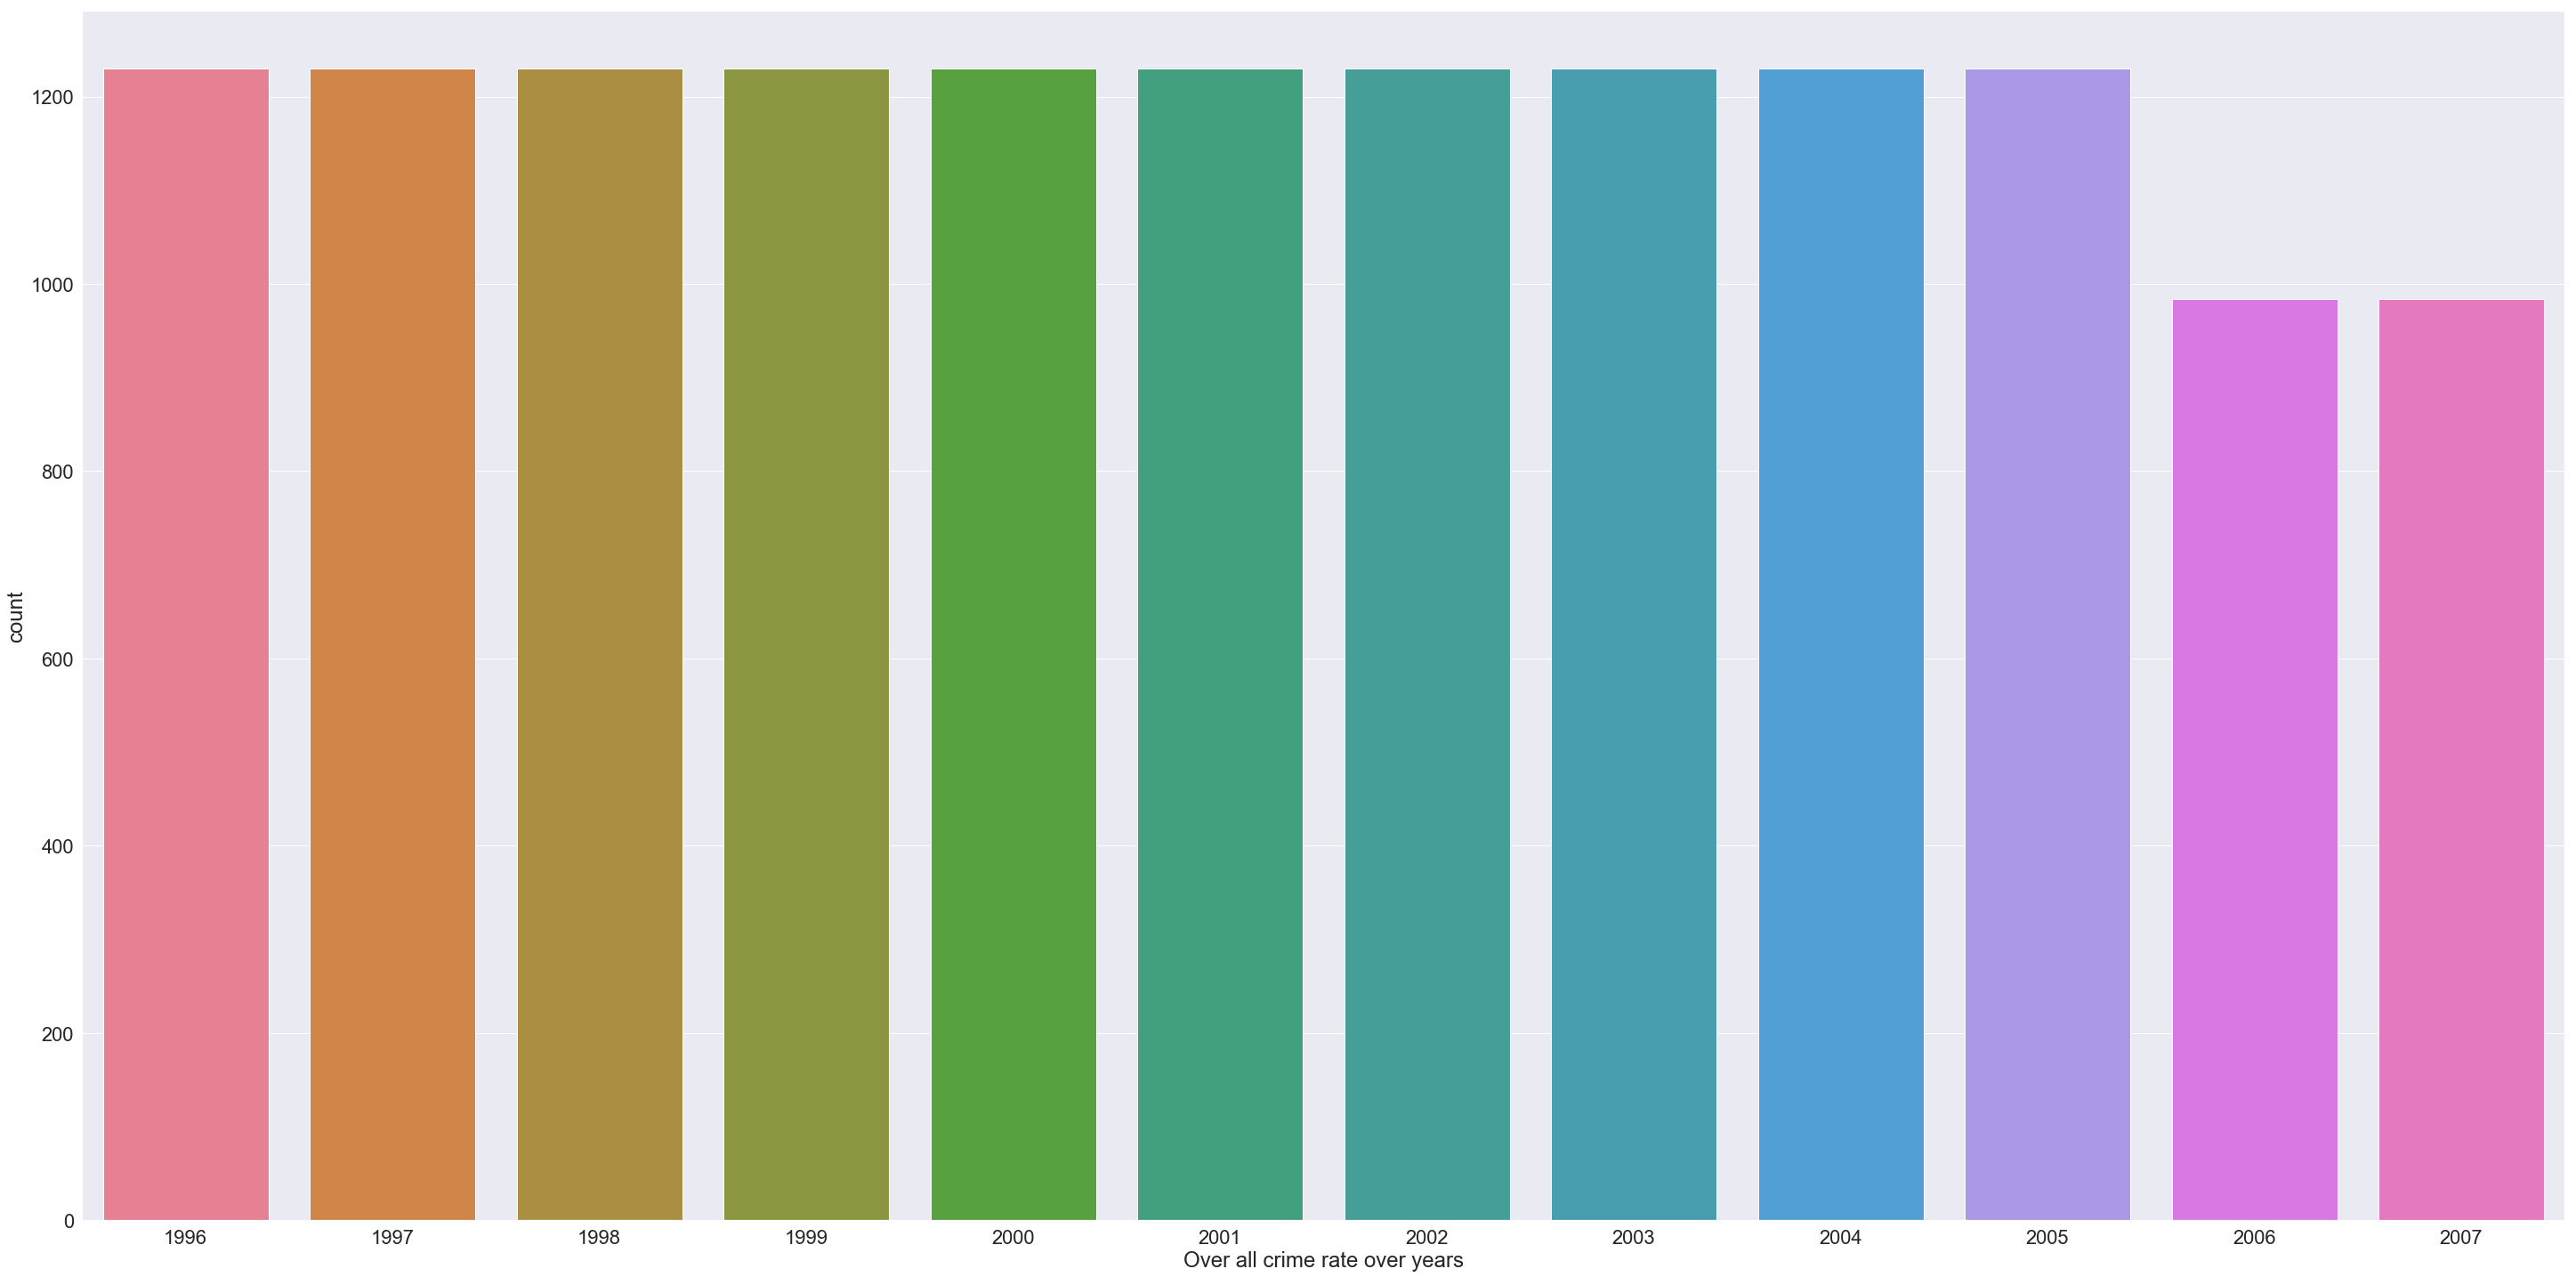

In [8]:
sns.set(rc={'figure.figsize':(50,25)}, font_scale=2)
sns.countplot(x=clean_df, palette='husl', data=crime_df).set_xlabel("Over all crime rate over years")

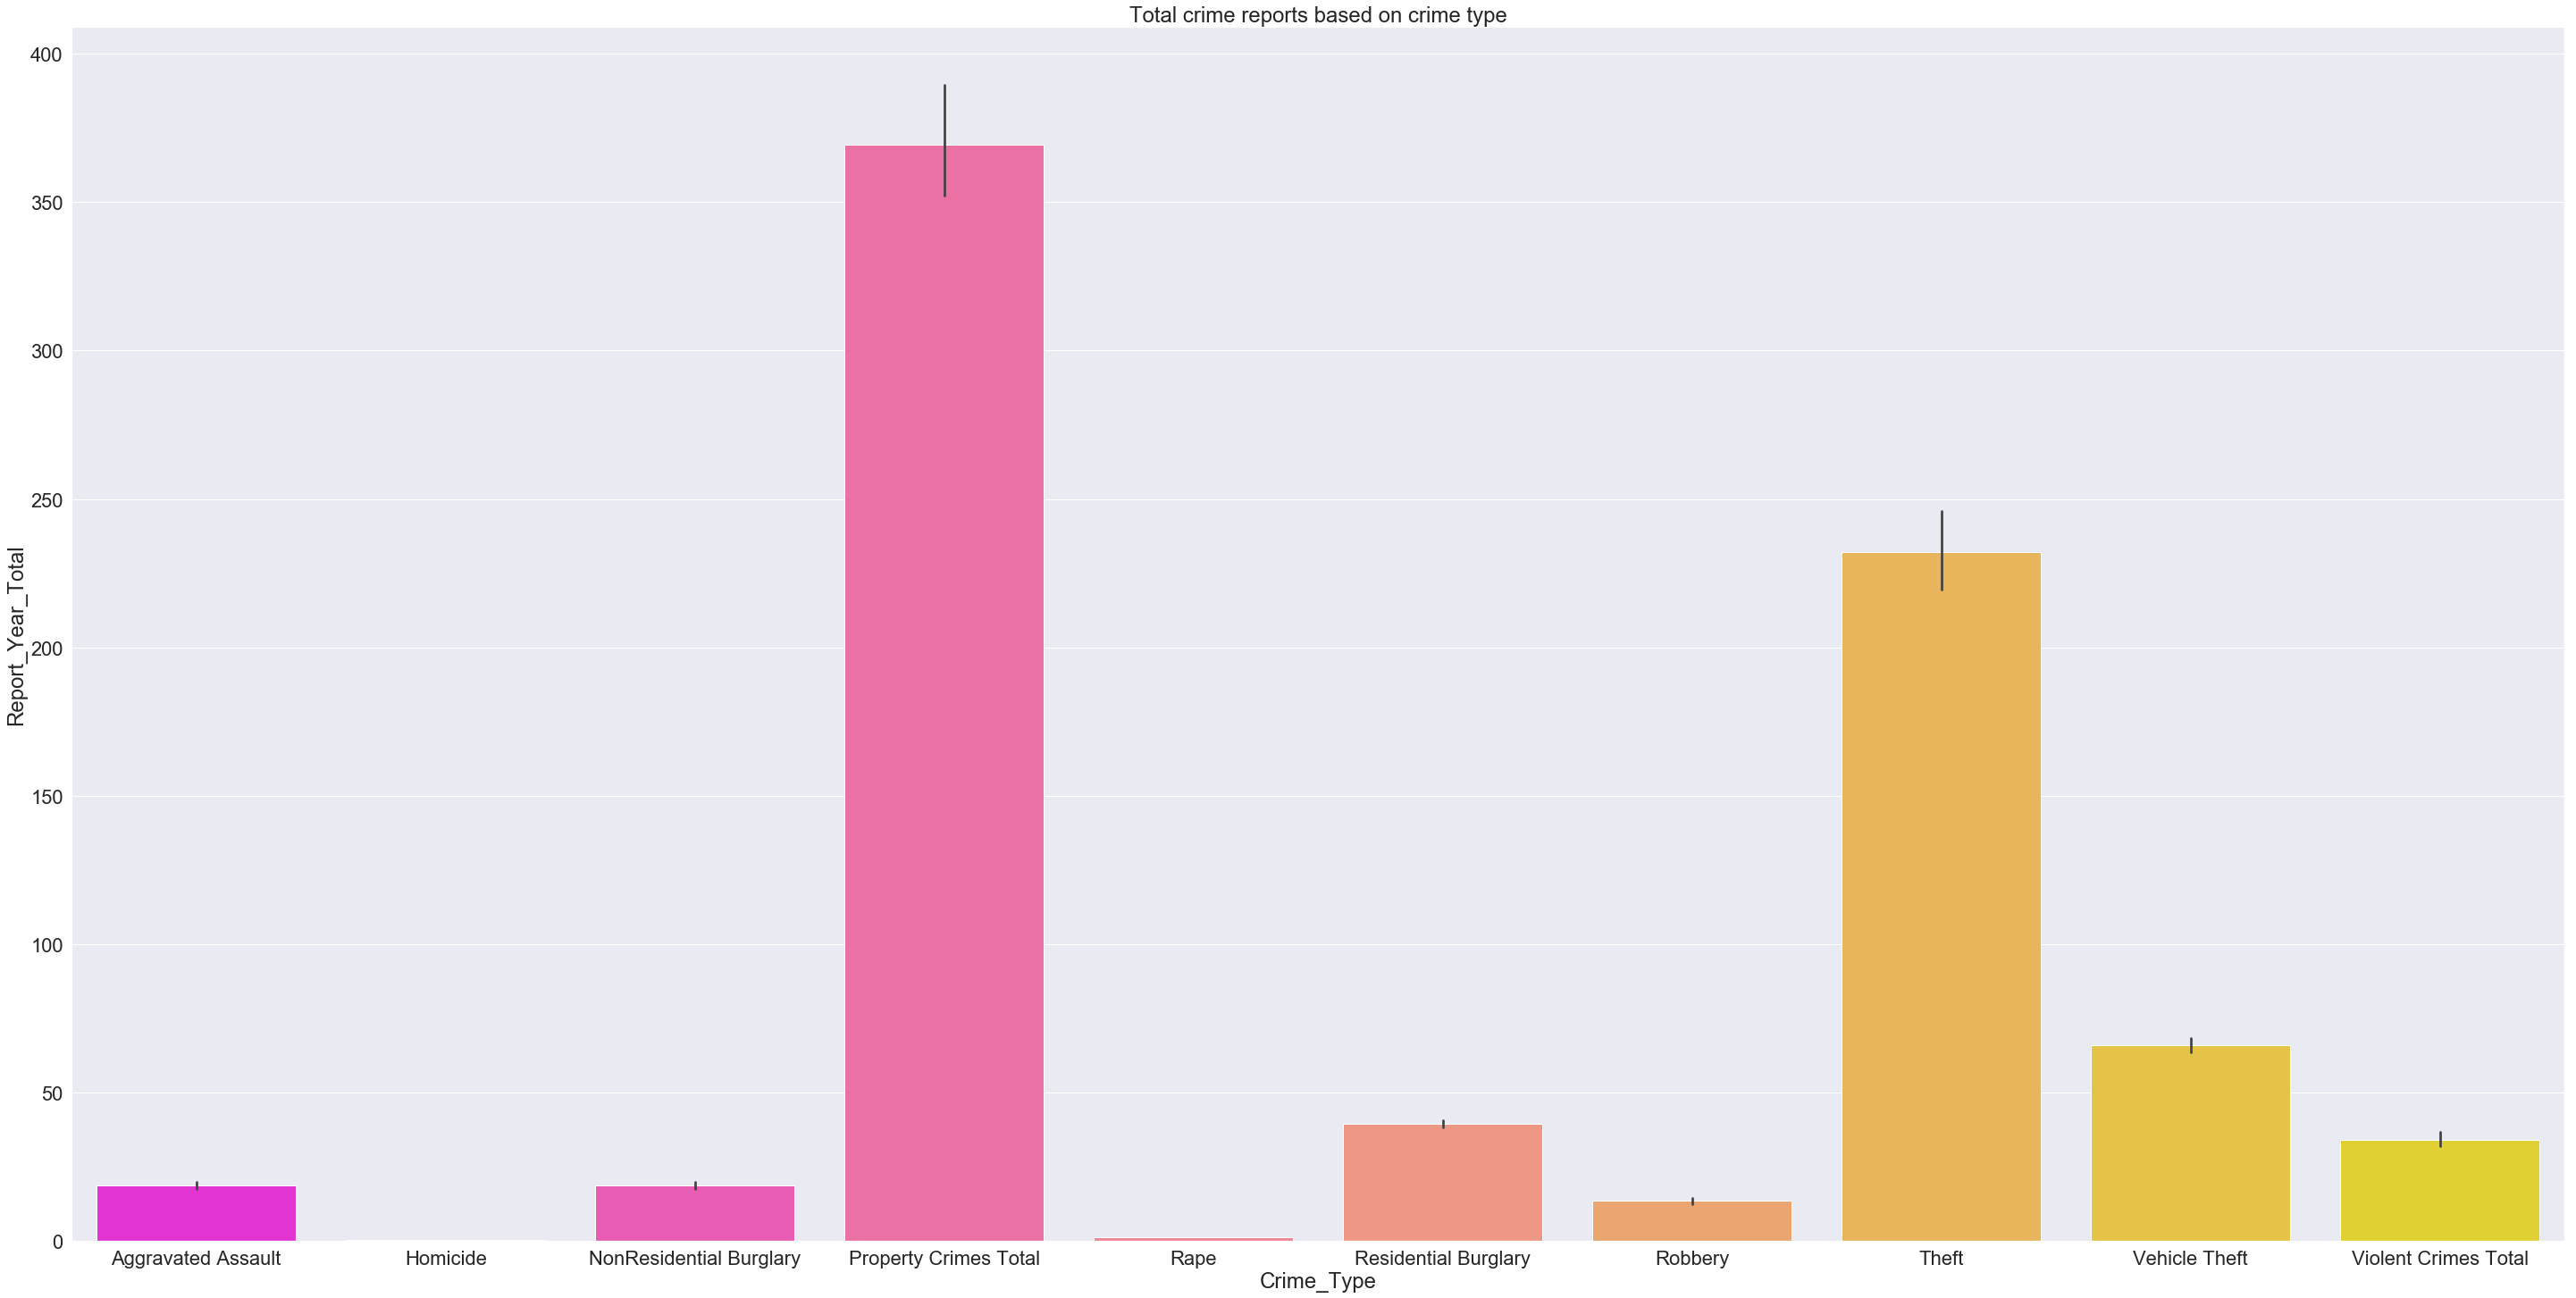

In [9]:
fig = sns.barplot(x="Crime_Type", y="Report_Year_Total",palette="spring",  data=crime_df)
plt.xlabel("Crime_Type")
plt.ylabel("Report_Year_Total")
plt.title("Total crime reports based on crime type")
plt.show(fig)

In [10]:
# Max reported year total and mean
df_seattle_1990_2007.groupby('Report_Year').agg({'Report_Year_Total':['max','mean']})


Report_Year_Total           
                          max       mean
Report_Year                             
1996                     4372  90.061789
1997                     3792  91.675610
1998                     3378  85.558537
1999                     3073  80.568293
2000                     2571  73.308943
2001                     2100  74.671545
2002                     2321  75.309756
2003                     2449  81.548780
2004                     1982  75.715447
2005                     1877  77.323577
2006                     1499  44.140244
2007                     1598  38.169715

In [11]:
# Max reported crime type based on report_year_total and mean
df_seattle_1990_2007.groupby('Crime_Type').agg({'Report_Year_Total':['max','mean']})

Report_Year_Total            
                                      max        mean
Crime_Type                                           
Aggravated Assault                    215   18.647019
Homicide                                6    0.270325
NonResidential Burglary               218   18.731030
Property Crimes Total                4372  369.516260
Rape                                   21    1.285908
Residential Burglary                  184   39.456640
Robbery                               226   13.537263
Theft                                4005  232.132114
Vehicle Theft                         305   65.838076
Violent Crimes Total                  456   34.195935

In [12]:
def over_time(col):
    ax = sns.swarmplot(x="Crime_Type", y=col, data=df_seattle_1990_2007)
    ax.set(xlabel='Crime_Type')

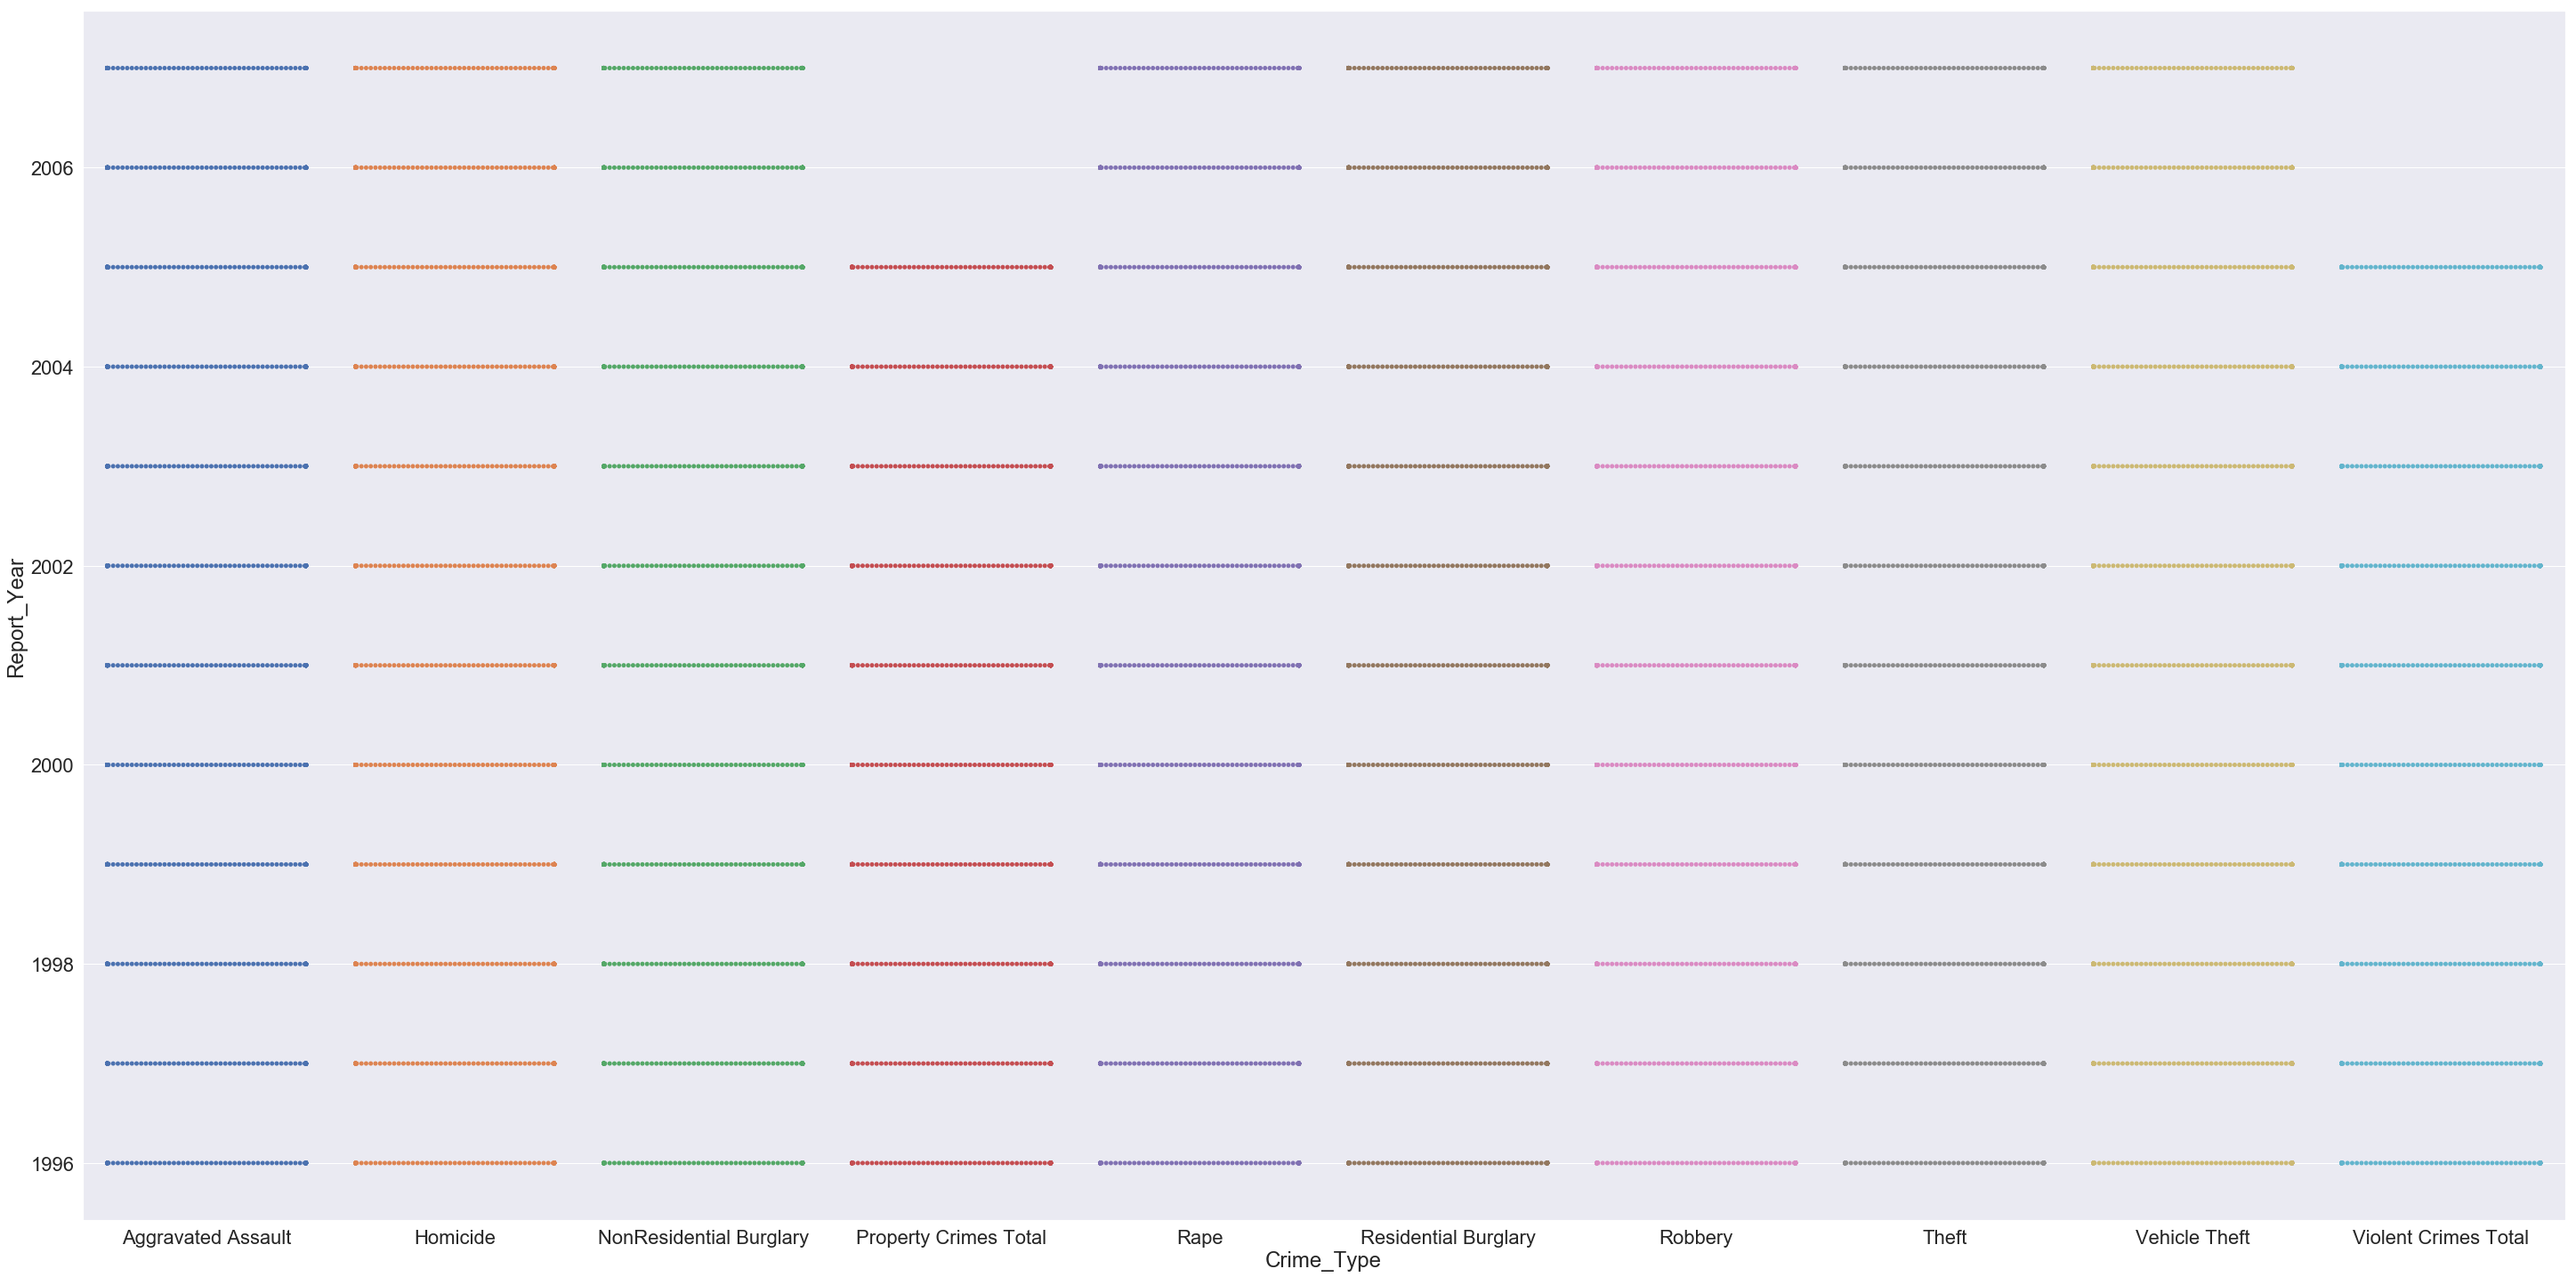

In [13]:
over_time('Report_Year')

In [14]:
df_seattle_1990_2007

,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
0,1996,1.0,Aggravated Assault,11
1,1996,1.0,Homicide,0
2,1996,1.0,NonResidential Burglary,41
3,1996,1.0,Property Crimes Total,430
4,1996,1.0,Rape,2
5,1996,1.0,Residential Burglary,42
6,1996,1.0,Robbery,2
7,1996,1.0,Theft,293
8,1996,1.0,Vehicle Theft,53
9,1996,1.0,Violent Crimes Total,15


In [15]:
df = df_seattle_1990_2007[["Report_Year", "Crime_Type", "Report_Year_Total"]]

# cmap = plt.cm.Spectral
# df.plot.scatter(x='Report_Year_Total', y='Report_Year', c="Crime_Type", norm= norm, cmap=cmap)

In [16]:
df_seattle_1990_2007.Crime_Type.unique()

array(['Aggravated Assault', 'Homicide', 'NonResidential Burglary',
       'Property Crimes Total', 'Rape', 'Residential Burglary', 'Robbery',
       'Theft', 'Vehicle Theft', 'Violent Crimes Total'], dtype=object)

In [17]:
# NOTE: Check for crimes that did not get reported and compared the years
df_seattle_1990_2007[df_seattle_1990_2007.duplicated()]

,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
13289,2007,NaN,Homicide,0
13290,2007,NaN,Homicide,0
13291,2007,NaN,Homicide,0
13298,2007,NaN,Rape,0


In [18]:
df_seattle_1990_2007["Report_Year"].unique()

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007])

In [21]:
keys = df_seattle_1990_2007["Report_Year"].unique()
crime = df_seattle_1990_2007["Crime_Type"].unique()
new_dict = {}

keys = df_seattle_1990_2007["Report_Year"].unique()
for key in keys:
    year_df = df_seattle_1990_2007[df_seattle_1990_2007["Report_Year"] == key]
    aggregation_functions = {'Report_Year_Total': 'sum'}
    df_new = df_seattle_1990_2007.groupby(['Report_Year','Crime_Type']).aggregate(aggregation_functions)
    crime_dict = df_new.to_dict('dict')
    print(crime_dict)

{'Report_Year_Total': {(1996, 'Aggravated Assault'): 2247, (1996, 'Homicide'): 35, (1996, 'NonResidential Burglary'): 2865, (1996, 'Property Crimes Total'): 51040, (1996, 'Rape'): 238, (1996, 'Residential Burglary'): 4977, (1996, 'Robbery'): 1952, (1996, 'Theft'): 36600, (1996, 'Vehicle Theft'): 6350, (1996, 'Violent Crimes Total'): 4472, (1997, 'Aggravated Assault'): 2628, (1997, 'Homicide'): 49, (1997, 'NonResidential Burglary'): 2841, (1997, 'Property Crimes Total'): 51547, (1997, 'Rape'): 203, (1997, 'Residential Burglary'): 5283, (1997, 'Robbery'): 2062, (1997, 'Theft'): 36168, (1997, 'Vehicle Theft'): 7038, (1997, 'Violent Crimes Total'): 4942, (1998, 'Aggravated Assault'): 2431, (1998, 'Homicide'): 47, (1998, 'NonResidential Burglary'): 2311, (1998, 'Property Crimes Total'): 48293, (1998, 'Rape'): 220, (1998, 'Residential Burglary'): 4629, (1998, 'Robbery'): 1719, (1998, 'Theft'): 33098, (1998, 'Vehicle Theft'): 8074, (1998, 'Violent Crimes Total'): 4415, (1999, 'Aggravated Assa

{'Report_Year_Total': {(1996, 'Aggravated Assault'): 2247, (1996, 'Homicide'): 35, (1996, 'NonResidential Burglary'): 2865, (1996, 'Property Crimes Total'): 51040, (1996, 'Rape'): 238, (1996, 'Residential Burglary'): 4977, (1996, 'Robbery'): 1952, (1996, 'Theft'): 36600, (1996, 'Vehicle Theft'): 6350, (1996, 'Violent Crimes Total'): 4472, (1997, 'Aggravated Assault'): 2628, (1997, 'Homicide'): 49, (1997, 'NonResidential Burglary'): 2841, (1997, 'Property Crimes Total'): 51547, (1997, 'Rape'): 203, (1997, 'Residential Burglary'): 5283, (1997, 'Robbery'): 2062, (1997, 'Theft'): 36168, (1997, 'Vehicle Theft'): 7038, (1997, 'Violent Crimes Total'): 4942, (1998, 'Aggravated Assault'): 2431, (1998, 'Homicide'): 47, (1998, 'NonResidential Burglary'): 2311, (1998, 'Property Crimes Total'): 48293, (1998, 'Rape'): 220, (1998, 'Residential Burglary'): 4629, (1998, 'Robbery'): 1719, (1998, 'Theft'): 33098, (1998, 'Vehicle Theft'): 8074, (1998, 'Violent Crimes Total'): 4415, (1999, 'Aggravated Assa

{'Report_Year_Total': {(1996, 'Aggravated Assault'): 2247, (1996, 'Homicide'): 35, (1996, 'NonResidential Burglary'): 2865, (1996, 'Property Crimes Total'): 51040, (1996, 'Rape'): 238, (1996, 'Residential Burglary'): 4977, (1996, 'Robbery'): 1952, (1996, 'Theft'): 36600, (1996, 'Vehicle Theft'): 6350, (1996, 'Violent Crimes Total'): 4472, (1997, 'Aggravated Assault'): 2628, (1997, 'Homicide'): 49, (1997, 'NonResidential Burglary'): 2841, (1997, 'Property Crimes Total'): 51547, (1997, 'Rape'): 203, (1997, 'Residential Burglary'): 5283, (1997, 'Robbery'): 2062, (1997, 'Theft'): 36168, (1997, 'Vehicle Theft'): 7038, (1997, 'Violent Crimes Total'): 4942, (1998, 'Aggravated Assault'): 2431, (1998, 'Homicide'): 47, (1998, 'NonResidential Burglary'): 2311, (1998, 'Property Crimes Total'): 48293, (1998, 'Rape'): 220, (1998, 'Residential Burglary'): 4629, (1998, 'Robbery'): 1719, (1998, 'Theft'): 33098, (1998, 'Vehicle Theft'): 8074, (1998, 'Violent Crimes Total'): 4415, (1999, 'Aggravated Assa

In [46]:
keys = df_seattle_1990_2007["Report_Year"].unique()
new_dict = {}

for key in keys:
    year_df = df_seattle_1990_2007[df_seattle_1990_2007["Report_Year"] == key]
    for values in year_df.iterrows():
        print(values)

(0, Report_Year                        1996
Census_Tract_1990                     1
Crime_Type           Aggravated Assault
Report_Year_Total                    11
Name: 0, dtype: object)
(1, Report_Year              1996
Census_Tract_1990           1
Crime_Type           Homicide
Report_Year_Total           0
Name: 1, dtype: object)
(2, Report_Year                             1996
Census_Tract_1990                          1
Crime_Type           NonResidential Burglary
Report_Year_Total                         41
Name: 2, dtype: object)
(3, Report_Year                           1996
Census_Tract_1990                        1
Crime_Type           Property Crimes Total
Report_Year_Total                      430
Name: 3, dtype: object)
(4, Report_Year          1996
Census_Tract_1990       1
Crime_Type           Rape
Report_Year_Total       2
Name: 4, dtype: object)
(5, Report_Year                          1996
Census_Tract_1990                       1
Crime_Type           Residential Bur

Name: 225, dtype: object)
(226, Report_Year             1996
Census_Tract_1990        119
Crime_Type           Robbery
Report_Year_Total          9
Name: 226, dtype: object)
(227, Report_Year           1996
Census_Tract_1990      119
Crime_Type           Theft
Report_Year_Total      172
Name: 227, dtype: object)
(228, Report_Year                   1996
Census_Tract_1990              119
Crime_Type           Vehicle Theft
Report_Year_Total               69
Name: 228, dtype: object)
(229, Report_Year                          1996
Census_Tract_1990                     119
Crime_Type           Violent Crimes Total
Report_Year_Total                      40
Name: 229, dtype: object)
(230, Report_Year                        1996
Census_Tract_1990                    12
Crime_Type           Aggravated Assault
Report_Year_Total                    16
Name: 230, dtype: object)
(231, Report_Year              1996
Census_Tract_1990          12
Crime_Type           Homicide
Report_Year_Total         

Name: 388, dtype: object)
(389, Report_Year                          1996
Census_Tract_1990                      24
Crime_Type           Violent Crimes Total
Report_Year_Total                       7
Name: 389, dtype: object)
(390, Report_Year                        1996
Census_Tract_1990                    25
Crime_Type           Aggravated Assault
Report_Year_Total                     5
Name: 390, dtype: object)
(391, Report_Year              1996
Census_Tract_1990          25
Crime_Type           Homicide
Report_Year_Total           0
Name: 391, dtype: object)
(392, Report_Year                             1996
Census_Tract_1990                         25
Crime_Type           NonResidential Burglary
Report_Year_Total                          1
Name: 392, dtype: object)
(393, Report_Year                           1996
Census_Tract_1990                       25
Crime_Type           Property Crimes Total
Report_Year_Total                       59
Name: 393, dtype: object)
(394, Report_Y

Name: 563, dtype: object)
(564, Report_Year           1996
Census_Tract_1990    40.98
Crime_Type            Rape
Report_Year_Total        0
Name: 564, dtype: object)
(565, Report_Year                          1996
Census_Tract_1990                   40.98
Crime_Type           Residential Burglary
Report_Year_Total                       9
Name: 565, dtype: object)
(566, Report_Year             1996
Census_Tract_1990      40.98
Crime_Type           Robbery
Report_Year_Total          0
Name: 566, dtype: object)
(567, Report_Year           1996
Census_Tract_1990    40.98
Crime_Type           Theft
Report_Year_Total       48
Name: 567, dtype: object)
(568, Report_Year                   1996
Census_Tract_1990            40.98
Crime_Type           Vehicle Theft
Report_Year_Total                8
Name: 568, dtype: object)
(569, Report_Year                          1996
Census_Tract_1990                   40.98
Crime_Type           Violent Crimes Total
Report_Year_Total                       0


Name: 714, dtype: object)
(715, Report_Year                          1996
Census_Tract_1990                   53.02
Crime_Type           Residential Burglary
Report_Year_Total                       0
Name: 715, dtype: object)
(716, Report_Year             1996
Census_Tract_1990      53.02
Crime_Type           Robbery
Report_Year_Total          0
Name: 716, dtype: object)
(717, Report_Year           1996
Census_Tract_1990    53.02
Crime_Type           Theft
Report_Year_Total       30
Name: 717, dtype: object)
(718, Report_Year                   1996
Census_Tract_1990            53.02
Crime_Type           Vehicle Theft
Report_Year_Total                7
Name: 718, dtype: object)
(719, Report_Year                          1996
Census_Tract_1990                   53.02
Crime_Type           Violent Crimes Total
Report_Year_Total                       2
Name: 719, dtype: object)
(720, Report_Year                        1996
Census_Tract_1990                    54
Crime_Type           Aggrava

Name: 815, dtype: object)
(816, Report_Year             1996
Census_Tract_1990         61
Crime_Type           Robbery
Report_Year_Total          5
Name: 816, dtype: object)
(817, Report_Year           1996
Census_Tract_1990       61
Crime_Type           Theft
Report_Year_Total      189
Name: 817, dtype: object)
(818, Report_Year                   1996
Census_Tract_1990               61
Crime_Type           Vehicle Theft
Report_Year_Total               47
Name: 818, dtype: object)
(819, Report_Year                          1996
Census_Tract_1990                      61
Crime_Type           Violent Crimes Total
Report_Year_Total                      10
Name: 819, dtype: object)
(820, Report_Year                        1996
Census_Tract_1990                    62
Crime_Type           Aggravated Assault
Report_Year_Total                     4
Name: 820, dtype: object)
(821, Report_Year              1996
Census_Tract_1990          62
Crime_Type           Homicide
Report_Year_Total         

(882, Report_Year                             1996
Census_Tract_1990                      68.98
Crime_Type           NonResidential Burglary
Report_Year_Total                         15
Name: 882, dtype: object)
(883, Report_Year                           1996
Census_Tract_1990                    68.98
Crime_Type           Property Crimes Total
Report_Year_Total                      166
Name: 883, dtype: object)
(884, Report_Year           1996
Census_Tract_1990    68.98
Crime_Type            Rape
Report_Year_Total        0
Name: 884, dtype: object)
(885, Report_Year                          1996
Census_Tract_1990                   68.98
Crime_Type           Residential Burglary
Report_Year_Total                      13
Name: 885, dtype: object)
(886, Report_Year             1996
Census_Tract_1990      68.98
Crime_Type           Robbery
Report_Year_Total          6
Name: 886, dtype: object)
(887, Report_Year           1996
Census_Tract_1990    68.98
Crime_Type           Theft
Report_Ye

Name: 977, dtype: object)
(978, Report_Year                   1996
Census_Tract_1990               76
Crime_Type           Vehicle Theft
Report_Year_Total               19
Name: 978, dtype: object)
(979, Report_Year                          1996
Census_Tract_1990                      76
Crime_Type           Violent Crimes Total
Report_Year_Total                      27
Name: 979, dtype: object)
(980, Report_Year                        1996
Census_Tract_1990                    77
Crime_Type           Aggravated Assault
Report_Year_Total                    20
Name: 980, dtype: object)
(981, Report_Year              1996
Census_Tract_1990          77
Crime_Type           Homicide
Report_Year_Total           0
Name: 981, dtype: object)
(982, Report_Year                             1996
Census_Tract_1990                         77
Crime_Type           NonResidential Burglary
Report_Year_Total                         14
Name: 982, dtype: object)
(983, Report_Year                           19

Name: 1255, dtype: object)
(1256, Report_Year             1997
Census_Tract_1990        100
Crime_Type           Robbery
Report_Year_Total         56
Name: 1256, dtype: object)
(1257, Report_Year           1997
Census_Tract_1990      100
Crime_Type           Theft
Report_Year_Total      437
Name: 1257, dtype: object)
(1258, Report_Year                   1997
Census_Tract_1990              100
Crime_Type           Vehicle Theft
Report_Year_Total              182
Name: 1258, dtype: object)
(1259, Report_Year                          1997
Census_Tract_1990                     100
Crime_Type           Violent Crimes Total
Report_Year_Total                     104
Name: 1259, dtype: object)
(1260, Report_Year                        1997
Census_Tract_1990                   101
Crime_Type           Aggravated Assault
Report_Year_Total                    27
Name: 1260, dtype: object)
(1261, Report_Year              1997
Census_Tract_1990         101
Crime_Type           Homicide
Report_Year_To

(1395, Report_Year                          1997
Census_Tract_1990                     113
Crime_Type           Residential Burglary
Report_Year_Total                      73
Name: 1395, dtype: object)
(1396, Report_Year             1997
Census_Tract_1990        113
Crime_Type           Robbery
Report_Year_Total         14
Name: 1396, dtype: object)
(1397, Report_Year           1997
Census_Tract_1990      113
Crime_Type           Theft
Report_Year_Total      191
Name: 1397, dtype: object)
(1398, Report_Year                   1997
Census_Tract_1990              113
Crime_Type           Vehicle Theft
Report_Year_Total              103
Name: 1398, dtype: object)
(1399, Report_Year                          1997
Census_Tract_1990                     113
Crime_Type           Violent Crimes Total
Report_Year_Total                      35
Name: 1399, dtype: object)
(1400, Report_Year                        1997
Census_Tract_1990                   114
Crime_Type           Aggravated Assault
Rep

Name: 1522, dtype: object)
(1523, Report_Year                           1997
Census_Tract_1990                       16
Crime_Type           Property Crimes Total
Report_Year_Total                      170
Name: 1523, dtype: object)
(1524, Report_Year          1997
Census_Tract_1990      16
Crime_Type           Rape
Report_Year_Total       0
Name: 1524, dtype: object)
(1525, Report_Year                          1997
Census_Tract_1990                      16
Crime_Type           Residential Burglary
Report_Year_Total                      19
Name: 1525, dtype: object)
(1526, Report_Year             1997
Census_Tract_1990         16
Crime_Type           Robbery
Report_Year_Total          8
Name: 1526, dtype: object)
(1527, Report_Year           1997
Census_Tract_1990       16
Crime_Type           Theft
Report_Year_Total      113
Name: 1527, dtype: object)
(1528, Report_Year                   1997
Census_Tract_1990               16
Crime_Type           Vehicle Theft
Report_Year_Total      

(1714, Report_Year          1997
Census_Tract_1990      33
Crime_Type           Rape
Report_Year_Total       0
Name: 1714, dtype: object)
(1715, Report_Year                          1997
Census_Tract_1990                      33
Crime_Type           Residential Burglary
Report_Year_Total                      41
Name: 1715, dtype: object)
(1716, Report_Year             1997
Census_Tract_1990         33
Crime_Type           Robbery
Report_Year_Total          4
Name: 1716, dtype: object)
(1717, Report_Year           1997
Census_Tract_1990       33
Crime_Type           Theft
Report_Year_Total      164
Name: 1717, dtype: object)
(1718, Report_Year                   1997
Census_Tract_1990               33
Crime_Type           Vehicle Theft
Report_Year_Total               47
Name: 1718, dtype: object)
(1719, Report_Year                          1997
Census_Tract_1990                      33
Crime_Type           Violent Crimes Total
Report_Year_Total                      15
Name: 1719, dtype: 

Name: 1912, dtype: object)
(1913, Report_Year                           1997
Census_Tract_1990                       51
Crime_Type           Property Crimes Total
Report_Year_Total                      273
Name: 1913, dtype: object)
(1914, Report_Year          1997
Census_Tract_1990      51
Crime_Type           Rape
Report_Year_Total       1
Name: 1914, dtype: object)
(1915, Report_Year                          1997
Census_Tract_1990                      51
Crime_Type           Residential Burglary
Report_Year_Total                      32
Name: 1915, dtype: object)
(1916, Report_Year             1997
Census_Tract_1990         51
Crime_Type           Robbery
Report_Year_Total          7
Name: 1916, dtype: object)
(1917, Report_Year           1997
Census_Tract_1990       51
Crime_Type           Theft
Report_Year_Total      197
Name: 1917, dtype: object)
(1918, Report_Year                   1997
Census_Tract_1990               51
Crime_Type           Vehicle Theft
Report_Year_Total      

Name: 2137, dtype: object)
(2138, Report_Year           1997
Census_Tract_1990        7
Crime_Type           Theft
Report_Year_Total      259
Name: 2138, dtype: object)
(2139, Report_Year                   1997
Census_Tract_1990                7
Crime_Type           Vehicle Theft
Report_Year_Total               52
Name: 2139, dtype: object)
(2140, Report_Year                          1997
Census_Tract_1990                       7
Crime_Type           Violent Crimes Total
Report_Year_Total                      17
Name: 2140, dtype: object)
(2141, Report_Year                        1997
Census_Tract_1990                    70
Crime_Type           Aggravated Assault
Report_Year_Total                     7
Name: 2141, dtype: object)
(2142, Report_Year              1997
Census_Tract_1990          70
Crime_Type           Homicide
Report_Year_Total           0
Name: 2142, dtype: object)
(2143, Report_Year                             1997
Census_Tract_1990                         70
Crime_Type

Name: 2318, dtype: object)
(2319, Report_Year                          1997
Census_Tract_1990                      86
Crime_Type           Violent Crimes Total
Report_Year_Total                      52
Name: 2319, dtype: object)
(2320, Report_Year                        1997
Census_Tract_1990                    87
Crime_Type           Aggravated Assault
Report_Year_Total                    57
Name: 2320, dtype: object)
(2321, Report_Year              1997
Census_Tract_1990          87
Crime_Type           Homicide
Report_Year_Total           1
Name: 2321, dtype: object)
(2322, Report_Year                             1997
Census_Tract_1990                         87
Crime_Type           NonResidential Burglary
Report_Year_Total                         11
Name: 2322, dtype: object)
(2323, Report_Year                           1997
Census_Tract_1990                       87
Crime_Type           Property Crimes Total
Report_Year_Total                      401
Name: 2323, dtype: object)
(23

Name: 2379, dtype: object)
(2380, Report_Year                        1997
Census_Tract_1990                    92
Crime_Type           Aggravated Assault
Report_Year_Total                    94
Name: 2380, dtype: object)
(2381, Report_Year              1997
Census_Tract_1990          92
Crime_Type           Homicide
Report_Year_Total           2
Name: 2381, dtype: object)
(2382, Report_Year                             1997
Census_Tract_1990                         92
Crime_Type           NonResidential Burglary
Report_Year_Total                         34
Name: 2382, dtype: object)
(2383, Report_Year                           1997
Census_Tract_1990                       92
Crime_Type           Property Crimes Total
Report_Year_Total                      551
Name: 2383, dtype: object)
(2384, Report_Year          1997
Census_Tract_1990      92
Crime_Type           Rape
Report_Year_Total       5
Name: 2384, dtype: object)
(2385, Report_Year                          1997
Census_Tract_1990 

Name: 2536, dtype: object)
(2537, Report_Year           1998
Census_Tract_1990      105
Crime_Type           Theft
Report_Year_Total      356
Name: 2537, dtype: object)
(2538, Report_Year                   1998
Census_Tract_1990              105
Crime_Type           Vehicle Theft
Report_Year_Total              105
Name: 2538, dtype: object)
(2539, Report_Year                          1998
Census_Tract_1990                     105
Crime_Type           Violent Crimes Total
Report_Year_Total                      40
Name: 2539, dtype: object)
(2540, Report_Year                        1998
Census_Tract_1990                   106
Crime_Type           Aggravated Assault
Report_Year_Total                    13
Name: 2540, dtype: object)
(2541, Report_Year              1998
Census_Tract_1990         106
Crime_Type           Homicide
Report_Year_Total           0
Name: 2541, dtype: object)
(2542, Report_Year                             1998
Census_Tract_1990                        106
Crime_Type

Name: 2756, dtype: object)
(2757, Report_Year           1998
Census_Tract_1990       16
Crime_Type           Theft
Report_Year_Total      101
Name: 2757, dtype: object)
(2758, Report_Year                   1998
Census_Tract_1990               16
Crime_Type           Vehicle Theft
Report_Year_Total               33
Name: 2758, dtype: object)
(2759, Report_Year                          1998
Census_Tract_1990                      16
Crime_Type           Violent Crimes Total
Report_Year_Total                      10
Name: 2759, dtype: object)
(2760, Report_Year                        1998
Census_Tract_1990                    17
Crime_Type           Aggravated Assault
Report_Year_Total                    25
Name: 2760, dtype: object)
(2761, Report_Year              1998
Census_Tract_1990          17
Crime_Type           Homicide
Report_Year_Total           1
Name: 2761, dtype: object)
(2762, Report_Year                             1998
Census_Tract_1990                         17
Crime_Type

(2914, Report_Year          1998
Census_Tract_1990      30
Crime_Type           Rape
Report_Year_Total       0
Name: 2914, dtype: object)
(2915, Report_Year                          1998
Census_Tract_1990                      30
Crime_Type           Residential Burglary
Report_Year_Total                      26
Name: 2915, dtype: object)
(2916, Report_Year             1998
Census_Tract_1990         30
Crime_Type           Robbery
Report_Year_Total          7
Name: 2916, dtype: object)
(2917, Report_Year           1998
Census_Tract_1990       30
Crime_Type           Theft
Report_Year_Total      205
Name: 2917, dtype: object)
(2918, Report_Year                   1998
Census_Tract_1990               30
Crime_Type           Vehicle Theft
Report_Year_Total               70
Name: 2918, dtype: object)
(2919, Report_Year                          1998
Census_Tract_1990                      30
Crime_Type           Violent Crimes Total
Report_Year_Total                      18
Name: 2919, dtype: 

Name: 3045, dtype: object)
(3046, Report_Year             1998
Census_Tract_1990         42
Crime_Type           Robbery
Report_Year_Total          3
Name: 3046, dtype: object)
(3047, Report_Year           1998
Census_Tract_1990       42
Crime_Type           Theft
Report_Year_Total      185
Name: 3047, dtype: object)
(3048, Report_Year                   1998
Census_Tract_1990               42
Crime_Type           Vehicle Theft
Report_Year_Total               44
Name: 3048, dtype: object)
(3049, Report_Year                          1998
Census_Tract_1990                      42
Crime_Type           Violent Crimes Total
Report_Year_Total                       3
Name: 3049, dtype: object)
(3050, Report_Year                        1998
Census_Tract_1990                    43
Crime_Type           Aggravated Assault
Report_Year_Total                    15
Name: 3050, dtype: object)
(3051, Report_Year              1998
Census_Tract_1990          43
Crime_Type           Homicide
Report_Year_To

Name: 3252, dtype: object)
(3253, Report_Year                           1998
Census_Tract_1990                        6
Crime_Type           Property Crimes Total
Report_Year_Total                      546
Name: 3253, dtype: object)
(3254, Report_Year          1998
Census_Tract_1990       6
Crime_Type           Rape
Report_Year_Total       4
Name: 3254, dtype: object)
(3255, Report_Year                          1998
Census_Tract_1990                       6
Crime_Type           Residential Burglary
Report_Year_Total                      47
Name: 3255, dtype: object)
(3256, Report_Year             1998
Census_Tract_1990          6
Crime_Type           Robbery
Report_Year_Total         22
Name: 3256, dtype: object)
(3257, Report_Year           1998
Census_Tract_1990        6
Crime_Type           Theft
Report_Year_Total      354
Name: 3257, dtype: object)
(3258, Report_Year                   1998
Census_Tract_1990                6
Crime_Type           Vehicle Theft
Report_Year_Total      

Name: 3399, dtype: object)
(3400, Report_Year                        1998
Census_Tract_1990                    73
Crime_Type           Aggravated Assault
Report_Year_Total                    26
Name: 3400, dtype: object)
(3401, Report_Year              1998
Census_Tract_1990          73
Crime_Type           Homicide
Report_Year_Total           2
Name: 3401, dtype: object)
(3402, Report_Year                             1998
Census_Tract_1990                         73
Crime_Type           NonResidential Burglary
Report_Year_Total                         46
Name: 3402, dtype: object)
(3403, Report_Year                           1998
Census_Tract_1990                       73
Crime_Type           Property Crimes Total
Report_Year_Total                      684
Name: 3403, dtype: object)
(3404, Report_Year          1998
Census_Tract_1990      73
Crime_Type           Rape
Report_Year_Total       2
Name: 3404, dtype: object)
(3405, Report_Year                          1998
Census_Tract_1990 

Name: 3560, dtype: object)
(3561, Report_Year              1998
Census_Tract_1990          88
Crime_Type           Homicide
Report_Year_Total           0
Name: 3561, dtype: object)
(3562, Report_Year                             1998
Census_Tract_1990                         88
Crime_Type           NonResidential Burglary
Report_Year_Total                         17
Name: 3562, dtype: object)
(3563, Report_Year                           1998
Census_Tract_1990                       88
Crime_Type           Property Crimes Total
Report_Year_Total                      351
Name: 3563, dtype: object)
(3564, Report_Year          1998
Census_Tract_1990      88
Crime_Type           Rape
Report_Year_Total       2
Name: 3564, dtype: object)
(3565, Report_Year                          1998
Census_Tract_1990                      88
Crime_Type           Residential Burglary
Report_Year_Total                      61
Name: 3565, dtype: object)
(3566, Report_Year             1998
Census_Tract_1990      

Name: 3738, dtype: object)
(3739, Report_Year                          1999
Census_Tract_1990                     102
Crime_Type           Violent Crimes Total
Report_Year_Total                      11
Name: 3739, dtype: object)
(3740, Report_Year                        1999
Census_Tract_1990                   103
Crime_Type           Aggravated Assault
Report_Year_Total                    50
Name: 3740, dtype: object)
(3741, Report_Year              1999
Census_Tract_1990         103
Crime_Type           Homicide
Report_Year_Total           2
Name: 3741, dtype: object)
(3742, Report_Year                             1999
Census_Tract_1990                        103
Crime_Type           NonResidential Burglary
Report_Year_Total                         43
Name: 3742, dtype: object)
(3743, Report_Year                           1999
Census_Tract_1990                      103
Crime_Type           Property Crimes Total
Report_Year_Total                      454
Name: 3743, dtype: object)
(37

Name: 3888, dtype: object)
(3889, Report_Year                          1999
Census_Tract_1990                     116
Crime_Type           Violent Crimes Total
Report_Year_Total                       9
Name: 3889, dtype: object)
(3890, Report_Year                        1999
Census_Tract_1990                   117
Crime_Type           Aggravated Assault
Report_Year_Total                    16
Name: 3890, dtype: object)
(3891, Report_Year              1999
Census_Tract_1990         117
Crime_Type           Homicide
Report_Year_Total           0
Name: 3891, dtype: object)
(3892, Report_Year                             1999
Census_Tract_1990                        117
Crime_Type           NonResidential Burglary
Report_Year_Total                         32
Name: 3892, dtype: object)
(3893, Report_Year                           1999
Census_Tract_1990                      117
Crime_Type           Property Crimes Total
Report_Year_Total                      206
Name: 3893, dtype: object)
(38

(4046, Report_Year             1999
Census_Tract_1990         21
Crime_Type           Robbery
Report_Year_Total          0
Name: 4046, dtype: object)
(4047, Report_Year           1999
Census_Tract_1990       21
Crime_Type           Theft
Report_Year_Total       48
Name: 4047, dtype: object)
(4048, Report_Year                   1999
Census_Tract_1990               21
Crime_Type           Vehicle Theft
Report_Year_Total               29
Name: 4048, dtype: object)
(4049, Report_Year                          1999
Census_Tract_1990                      21
Crime_Type           Violent Crimes Total
Report_Year_Total                      13
Name: 4049, dtype: object)
(4050, Report_Year                        1999
Census_Tract_1990                    22
Crime_Type           Aggravated Assault
Report_Year_Total                     1
Name: 4050, dtype: object)
(4051, Report_Year              1999
Census_Tract_1990          22
Crime_Type           Homicide
Report_Year_Total           0
Name: 4051,

(4183, Report_Year                           1999
Census_Tract_1990                       34
Crime_Type           Property Crimes Total
Report_Year_Total                      129
Name: 4183, dtype: object)
(4184, Report_Year          1999
Census_Tract_1990      34
Crime_Type           Rape
Report_Year_Total       1
Name: 4184, dtype: object)
(4185, Report_Year                          1999
Census_Tract_1990                      34
Crime_Type           Residential Burglary
Report_Year_Total                      18
Name: 4185, dtype: object)
(4186, Report_Year             1999
Census_Tract_1990         34
Crime_Type           Robbery
Report_Year_Total          2
Name: 4186, dtype: object)
(4187, Report_Year           1999
Census_Tract_1990       34
Crime_Type           Theft
Report_Year_Total       75
Name: 4187, dtype: object)
(4188, Report_Year                   1999
Census_Tract_1990               34
Crime_Type           Vehicle Theft
Report_Year_Total               33
Name: 4188, dty

Name: 4341, dtype: object)
(4342, Report_Year                             1999
Census_Tract_1990                         49
Crime_Type           NonResidential Burglary
Report_Year_Total                         23
Name: 4342, dtype: object)
(4343, Report_Year                           1999
Census_Tract_1990                       49
Crime_Type           Property Crimes Total
Report_Year_Total                      421
Name: 4343, dtype: object)
(4344, Report_Year          1999
Census_Tract_1990      49
Crime_Type           Rape
Report_Year_Total       2
Name: 4344, dtype: object)
(4345, Report_Year                          1999
Census_Tract_1990                      49
Crime_Type           Residential Burglary
Report_Year_Total                      59
Name: 4345, dtype: object)
(4346, Report_Year             1999
Census_Tract_1990         49
Crime_Type           Robbery
Report_Year_Total          4
Name: 4346, dtype: object)
(4347, Report_Year           1999
Census_Tract_1990       49
Cr

Name: 4482, dtype: object)
(4483, Report_Year                           1999
Census_Tract_1990                        6
Crime_Type           Property Crimes Total
Report_Year_Total                      497
Name: 4483, dtype: object)
(4484, Report_Year          1999
Census_Tract_1990       6
Crime_Type           Rape
Report_Year_Total       4
Name: 4484, dtype: object)
(4485, Report_Year                          1999
Census_Tract_1990                       6
Crime_Type           Residential Burglary
Report_Year_Total                      43
Name: 4485, dtype: object)
(4486, Report_Year             1999
Census_Tract_1990          6
Crime_Type           Robbery
Report_Year_Total         12
Name: 4486, dtype: object)
(4487, Report_Year           1999
Census_Tract_1990        6
Crime_Type           Theft
Report_Year_Total      320
Name: 4487, dtype: object)
(4488, Report_Year                   1999
Census_Tract_1990                6
Crime_Type           Vehicle Theft
Report_Year_Total      

Name: 4658, dtype: object)
(4659, Report_Year                          1999
Census_Tract_1990                      75
Crime_Type           Violent Crimes Total
Report_Year_Total                      75
Name: 4659, dtype: object)
(4660, Report_Year                        1999
Census_Tract_1990                    76
Crime_Type           Aggravated Assault
Report_Year_Total                     5
Name: 4660, dtype: object)
(4661, Report_Year              1999
Census_Tract_1990          76
Crime_Type           Homicide
Report_Year_Total           1
Name: 4661, dtype: object)
(4662, Report_Year                             1999
Census_Tract_1990                         76
Crime_Type           NonResidential Burglary
Report_Year_Total                          7
Name: 4662, dtype: object)
(4663, Report_Year                           1999
Census_Tract_1990                       76
Crime_Type           Property Crimes Total
Report_Year_Total                      250
Name: 4663, dtype: object)
(46

Name: 4813, dtype: object)
(4814, Report_Year          1999
Census_Tract_1990       9
Crime_Type           Rape
Report_Year_Total       0
Name: 4814, dtype: object)
(4815, Report_Year                          1999
Census_Tract_1990                       9
Crime_Type           Residential Burglary
Report_Year_Total                      16
Name: 4815, dtype: object)
(4816, Report_Year             1999
Census_Tract_1990          9
Crime_Type           Robbery
Report_Year_Total          0
Name: 4816, dtype: object)
(4817, Report_Year           1999
Census_Tract_1990        9
Crime_Type           Theft
Report_Year_Total       23
Name: 4817, dtype: object)
(4818, Report_Year                   1999
Census_Tract_1990                9
Crime_Type           Vehicle Theft
Report_Year_Total               13
Name: 4818, dtype: object)
(4819, Report_Year                          1999
Census_Tract_1990                       9
Crime_Type           Violent Crimes Total
Report_Year_Total                 

(4951, Report_Year              2000
Census_Tract_1990         101
Crime_Type           Homicide
Report_Year_Total           3
Name: 4951, dtype: object)
(4952, Report_Year                             2000
Census_Tract_1990                        101
Crime_Type           NonResidential Burglary
Report_Year_Total                         25
Name: 4952, dtype: object)
(4953, Report_Year                           2000
Census_Tract_1990                      101
Crime_Type           Property Crimes Total
Report_Year_Total                      514
Name: 4953, dtype: object)
(4954, Report_Year          2000
Census_Tract_1990     101
Crime_Type           Rape
Report_Year_Total       1
Name: 4954, dtype: object)
(4955, Report_Year                          2000
Census_Tract_1990                     101
Crime_Type           Residential Burglary
Report_Year_Total                      96
Name: 4955, dtype: object)
(4956, Report_Year             2000
Census_Tract_1990        101
Crime_Type           

Name: 5138, dtype: object)
(5139, Report_Year                          2000
Census_Tract_1990                     118
Crime_Type           Violent Crimes Total
Report_Year_Total                     143
Name: 5139, dtype: object)
(5140, Report_Year                        2000
Census_Tract_1990                   119
Crime_Type           Aggravated Assault
Report_Year_Total                    29
Name: 5140, dtype: object)
(5141, Report_Year              2000
Census_Tract_1990         119
Crime_Type           Homicide
Report_Year_Total           0
Name: 5141, dtype: object)
(5142, Report_Year                             2000
Census_Tract_1990                        119
Crime_Type           NonResidential Burglary
Report_Year_Total                          5
Name: 5142, dtype: object)
(5143, Report_Year                           2000
Census_Tract_1990                      119
Crime_Type           Property Crimes Total
Report_Year_Total                      223
Name: 5143, dtype: object)
(51

(5307, Report_Year           2000
Census_Tract_1990       24
Crime_Type           Theft
Report_Year_Total       35
Name: 5307, dtype: object)
(5308, Report_Year                   2000
Census_Tract_1990               24
Crime_Type           Vehicle Theft
Report_Year_Total               11
Name: 5308, dtype: object)
(5309, Report_Year                          2000
Census_Tract_1990                      24
Crime_Type           Violent Crimes Total
Report_Year_Total                       3
Name: 5309, dtype: object)
(5310, Report_Year                        2000
Census_Tract_1990                    25
Crime_Type           Aggravated Assault
Report_Year_Total                     0
Name: 5310, dtype: object)
(5311, Report_Year              2000
Census_Tract_1990          25
Crime_Type           Homicide
Report_Year_Total           0
Name: 5311, dtype: object)
(5312, Report_Year                             2000
Census_Tract_1990                         25
Crime_Type           NonResidential B

Name: 5442, dtype: object)
(5443, Report_Year                           2000
Census_Tract_1990                       37
Crime_Type           Property Crimes Total
Report_Year_Total                       44
Name: 5443, dtype: object)
(5444, Report_Year          2000
Census_Tract_1990      37
Crime_Type           Rape
Report_Year_Total       0
Name: 5444, dtype: object)
(5445, Report_Year                          2000
Census_Tract_1990                      37
Crime_Type           Residential Burglary
Report_Year_Total                       6
Name: 5445, dtype: object)
(5446, Report_Year             2000
Census_Tract_1990         37
Crime_Type           Robbery
Report_Year_Total          1
Name: 5446, dtype: object)
(5447, Report_Year           2000
Census_Tract_1990       37
Crime_Type           Theft
Report_Year_Total       30
Name: 5447, dtype: object)
(5448, Report_Year                   2000
Census_Tract_1990               37
Crime_Type           Vehicle Theft
Report_Year_Total      

Name: 5634, dtype: object)
(5635, Report_Year                          2000
Census_Tract_1990                   53.02
Crime_Type           Residential Burglary
Report_Year_Total                       1
Name: 5635, dtype: object)
(5636, Report_Year             2000
Census_Tract_1990      53.02
Crime_Type           Robbery
Report_Year_Total          3
Name: 5636, dtype: object)
(5637, Report_Year           2000
Census_Tract_1990    53.02
Crime_Type           Theft
Report_Year_Total       22
Name: 5637, dtype: object)
(5638, Report_Year                   2000
Census_Tract_1990            53.02
Crime_Type           Vehicle Theft
Report_Year_Total               12
Name: 5638, dtype: object)
(5639, Report_Year                          2000
Census_Tract_1990                   53.02
Crime_Type           Violent Crimes Total
Report_Year_Total                       7
Name: 5639, dtype: object)
(5640, Report_Year                        2000
Census_Tract_1990                    54
Crime_Type      

Name: 5782, dtype: object)
(5783, Report_Year                           2000
Census_Tract_1990                       66
Crime_Type           Property Crimes Total
Report_Year_Total                      403
Name: 5783, dtype: object)
(5784, Report_Year          2000
Census_Tract_1990      66
Crime_Type           Rape
Report_Year_Total       1
Name: 5784, dtype: object)
(5785, Report_Year                          2000
Census_Tract_1990                      66
Crime_Type           Residential Burglary
Report_Year_Total                      25
Name: 5785, dtype: object)
(5786, Report_Year             2000
Census_Tract_1990         66
Crime_Type           Robbery
Report_Year_Total          5
Name: 5786, dtype: object)
(5787, Report_Year           2000
Census_Tract_1990       66
Crime_Type           Theft
Report_Year_Total      227
Name: 5787, dtype: object)
(5788, Report_Year                   2000
Census_Tract_1990               66
Crime_Type           Vehicle Theft
Report_Year_Total      

Name: 5986, dtype: object)
(5987, Report_Year           2000
Census_Tract_1990       84
Crime_Type           Theft
Report_Year_Total      450
Name: 5987, dtype: object)
(5988, Report_Year                   2000
Census_Tract_1990               84
Crime_Type           Vehicle Theft
Report_Year_Total               97
Name: 5988, dtype: object)
(5989, Report_Year                          2000
Census_Tract_1990                      84
Crime_Type           Violent Crimes Total
Report_Year_Total                      62
Name: 5989, dtype: object)
(5990, Report_Year                        2000
Census_Tract_1990                    85
Crime_Type           Aggravated Assault
Report_Year_Total                    30
Name: 5990, dtype: object)
(5991, Report_Year              2000
Census_Tract_1990          85
Crime_Type           Homicide
Report_Year_Total           1
Name: 5991, dtype: object)
(5992, Report_Year                             2000
Census_Tract_1990                         85
Crime_Type

Name: 6187, dtype: object)
(6188, Report_Year                   2001
Census_Tract_1990              101
Crime_Type           Vehicle Theft
Report_Year_Total              128
Name: 6188, dtype: object)
(6189, Report_Year                          2001
Census_Tract_1990                     101
Crime_Type           Violent Crimes Total
Report_Year_Total                      78
Name: 6189, dtype: object)
(6190, Report_Year                        2001
Census_Tract_1990                   102
Crime_Type           Aggravated Assault
Report_Year_Total                    21
Name: 6190, dtype: object)
(6191, Report_Year              2001
Census_Tract_1990         102
Crime_Type           Homicide
Report_Year_Total           0
Name: 6191, dtype: object)
(6192, Report_Year                             2001
Census_Tract_1990                        102
Crime_Type           NonResidential Burglary
Report_Year_Total                          8
Name: 6192, dtype: object)
(6193, Report_Year                 

Name: 6312, dtype: object)
(6313, Report_Year                           2001
Census_Tract_1990                      113
Crime_Type           Property Crimes Total
Report_Year_Total                      379
Name: 6313, dtype: object)
(6314, Report_Year          2001
Census_Tract_1990     113
Crime_Type           Rape
Report_Year_Total       2
Name: 6314, dtype: object)
(6315, Report_Year                          2001
Census_Tract_1990                     113
Crime_Type           Residential Burglary
Report_Year_Total                      54
Name: 6315, dtype: object)
(6316, Report_Year             2001
Census_Tract_1990        113
Crime_Type           Robbery
Report_Year_Total         10
Name: 6316, dtype: object)
(6317, Report_Year           2001
Census_Tract_1990      113
Crime_Type           Theft
Report_Year_Total      198
Name: 6317, dtype: object)
(6318, Report_Year                   2001
Census_Tract_1990              113
Crime_Type           Vehicle Theft
Report_Year_Total      

Name: 6497, dtype: object)
(6498, Report_Year                   2001
Census_Tract_1990               20
Crime_Type           Vehicle Theft
Report_Year_Total               42
Name: 6498, dtype: object)
(6499, Report_Year                          2001
Census_Tract_1990                      20
Crime_Type           Violent Crimes Total
Report_Year_Total                       5
Name: 6499, dtype: object)
(6500, Report_Year                        2001
Census_Tract_1990                    21
Crime_Type           Aggravated Assault
Report_Year_Total                     9
Name: 6500, dtype: object)
(6501, Report_Year              2001
Census_Tract_1990          21
Crime_Type           Homicide
Report_Year_Total           0
Name: 6501, dtype: object)
(6502, Report_Year                             2001
Census_Tract_1990                         21
Crime_Type           NonResidential Burglary
Report_Year_Total                          4
Name: 6502, dtype: object)
(6503, Report_Year                 

Name: 6672, dtype: object)
(6673, Report_Year                           2001
Census_Tract_1990                       37
Crime_Type           Property Crimes Total
Report_Year_Total                       48
Name: 6673, dtype: object)
(6674, Report_Year          2001
Census_Tract_1990      37
Crime_Type           Rape
Report_Year_Total       0
Name: 6674, dtype: object)
(6675, Report_Year                          2001
Census_Tract_1990                      37
Crime_Type           Residential Burglary
Report_Year_Total                       5
Name: 6675, dtype: object)
(6676, Report_Year             2001
Census_Tract_1990         37
Crime_Type           Robbery
Report_Year_Total          1
Name: 6676, dtype: object)
(6677, Report_Year           2001
Census_Tract_1990       37
Crime_Type           Theft
Report_Year_Total       25
Name: 6677, dtype: object)
(6678, Report_Year                   2001
Census_Tract_1990               37
Crime_Type           Vehicle Theft
Report_Year_Total      

Name: 6865, dtype: object)
(6866, Report_Year             2001
Census_Tract_1990      53.02
Crime_Type           Robbery
Report_Year_Total          3
Name: 6866, dtype: object)
(6867, Report_Year           2001
Census_Tract_1990    53.02
Crime_Type           Theft
Report_Year_Total       27
Name: 6867, dtype: object)
(6868, Report_Year                   2001
Census_Tract_1990            53.02
Crime_Type           Vehicle Theft
Report_Year_Total               10
Name: 6868, dtype: object)
(6869, Report_Year                          2001
Census_Tract_1990                   53.02
Crime_Type           Violent Crimes Total
Report_Year_Total                       6
Name: 6869, dtype: object)
(6870, Report_Year                        2001
Census_Tract_1990                    54
Crime_Type           Aggravated Assault
Report_Year_Total                     9
Name: 6870, dtype: object)
(6871, Report_Year              2001
Census_Tract_1990          54
Crime_Type           Homicide
Report_Year_To

Name: 6990, dtype: object)
(6991, Report_Year              2001
Census_Tract_1990          64
Crime_Type           Homicide
Report_Year_Total           0
Name: 6991, dtype: object)
(6992, Report_Year                             2001
Census_Tract_1990                         64
Crime_Type           NonResidential Burglary
Report_Year_Total                          4
Name: 6992, dtype: object)
(6993, Report_Year                           2001
Census_Tract_1990                       64
Crime_Type           Property Crimes Total
Report_Year_Total                      146
Name: 6993, dtype: object)
(6994, Report_Year          2001
Census_Tract_1990      64
Crime_Type           Rape
Report_Year_Total       0
Name: 6994, dtype: object)
(6995, Report_Year                          2001
Census_Tract_1990                      64
Crime_Type           Residential Burglary
Report_Year_Total                      27
Name: 6995, dtype: object)
(6996, Report_Year             2001
Census_Tract_1990      

Name: 7127, dtype: object)
(7128, Report_Year                   2001
Census_Tract_1990               76
Crime_Type           Vehicle Theft
Report_Year_Total               40
Name: 7128, dtype: object)
(7129, Report_Year                          2001
Census_Tract_1990                      76
Crime_Type           Violent Crimes Total
Report_Year_Total                      36
Name: 7129, dtype: object)
(7130, Report_Year                        2001
Census_Tract_1990                    77
Crime_Type           Aggravated Assault
Report_Year_Total                    19
Name: 7130, dtype: object)
(7131, Report_Year              2001
Census_Tract_1990          77
Crime_Type           Homicide
Report_Year_Total           0
Name: 7131, dtype: object)
(7132, Report_Year                             2001
Census_Tract_1990                         77
Crime_Type           NonResidential Burglary
Report_Year_Total                          9
Name: 7132, dtype: object)
(7133, Report_Year                 

Name: 7404, dtype: object)
(7405, Report_Year                          2002
Census_Tract_1990                     100
Crime_Type           Residential Burglary
Report_Year_Total                      49
Name: 7405, dtype: object)
(7406, Report_Year             2002
Census_Tract_1990        100
Crime_Type           Robbery
Report_Year_Total         34
Name: 7406, dtype: object)
(7407, Report_Year           2002
Census_Tract_1990      100
Crime_Type           Theft
Report_Year_Total      322
Name: 7407, dtype: object)
(7408, Report_Year                   2002
Census_Tract_1990              100
Crime_Type           Vehicle Theft
Report_Year_Total              108
Name: 7408, dtype: object)
(7409, Report_Year                          2002
Census_Tract_1990                     100
Crime_Type           Violent Crimes Total
Report_Year_Total                      77
Name: 7409, dtype: object)
(7410, Report_Year                        2002
Census_Tract_1990                   101
Crime_Type      

Name: 7541, dtype: object)
(7542, Report_Year                             2002
Census_Tract_1990                        113
Crime_Type           NonResidential Burglary
Report_Year_Total                         13
Name: 7542, dtype: object)
(7543, Report_Year                           2002
Census_Tract_1990                      113
Crime_Type           Property Crimes Total
Report_Year_Total                      398
Name: 7543, dtype: object)
(7544, Report_Year          2002
Census_Tract_1990     113
Crime_Type           Rape
Report_Year_Total       0
Name: 7544, dtype: object)
(7545, Report_Year                          2002
Census_Tract_1990                     113
Crime_Type           Residential Burglary
Report_Year_Total                     110
Name: 7545, dtype: object)
(7546, Report_Year             2002
Census_Tract_1990        113
Crime_Type           Robbery
Report_Year_Total         14
Name: 7546, dtype: object)
(7547, Report_Year           2002
Census_Tract_1990      113
Cr

Name: 7741, dtype: object)
(7742, Report_Year                             2002
Census_Tract_1990                         22
Crime_Type           NonResidential Burglary
Report_Year_Total                          3
Name: 7742, dtype: object)
(7743, Report_Year                           2002
Census_Tract_1990                       22
Crime_Type           Property Crimes Total
Report_Year_Total                       95
Name: 7743, dtype: object)
(7744, Report_Year          2002
Census_Tract_1990      22
Crime_Type           Rape
Report_Year_Total       0
Name: 7744, dtype: object)
(7745, Report_Year                          2002
Census_Tract_1990                      22
Crime_Type           Residential Burglary
Report_Year_Total                      13
Name: 7745, dtype: object)
(7746, Report_Year             2002
Census_Tract_1990         22
Crime_Type           Robbery
Report_Year_Total          5
Name: 7746, dtype: object)
(7747, Report_Year           2002
Census_Tract_1990       22
Cr

(7975, Report_Year                          2002
Census_Tract_1990                      43
Crime_Type           Residential Burglary
Report_Year_Total                      86
Name: 7975, dtype: object)
(7976, Report_Year             2002
Census_Tract_1990         43
Crime_Type           Robbery
Report_Year_Total         14
Name: 7976, dtype: object)
(7977, Report_Year           2002
Census_Tract_1990       43
Crime_Type           Theft
Report_Year_Total      277
Name: 7977, dtype: object)
(7978, Report_Year                   2002
Census_Tract_1990               43
Crime_Type           Vehicle Theft
Report_Year_Total               92
Name: 7978, dtype: object)
(7979, Report_Year                          2002
Census_Tract_1990                      43
Crime_Type           Violent Crimes Total
Report_Year_Total                      23
Name: 7979, dtype: object)
(7980, Report_Year                        2002
Census_Tract_1990                    44
Crime_Type           Aggravated Assault
Rep

Name: 8143, dtype: object)
(8144, Report_Year           2002
Census_Tract_1990    58.01
Crime_Type            Rape
Report_Year_Total        1
Name: 8144, dtype: object)
(8145, Report_Year                          2002
Census_Tract_1990                   58.01
Crime_Type           Residential Burglary
Report_Year_Total                      29
Name: 8145, dtype: object)
(8146, Report_Year             2002
Census_Tract_1990      58.01
Crime_Type           Robbery
Report_Year_Total          3
Name: 8146, dtype: object)
(8147, Report_Year           2002
Census_Tract_1990    58.01
Crime_Type           Theft
Report_Year_Total      120
Name: 8147, dtype: object)
(8148, Report_Year                   2002
Census_Tract_1990            58.01
Crime_Type           Vehicle Theft
Report_Year_Total               49
Name: 8148, dtype: object)
(8149, Report_Year                          2002
Census_Tract_1990                   58.01
Crime_Type           Violent Crimes Total
Report_Year_Total             

Name: 8349, dtype: object)
(8350, Report_Year                        2002
Census_Tract_1990                    76
Crime_Type           Aggravated Assault
Report_Year_Total                    14
Name: 8350, dtype: object)
(8351, Report_Year              2002
Census_Tract_1990          76
Crime_Type           Homicide
Report_Year_Total           0
Name: 8351, dtype: object)
(8352, Report_Year                             2002
Census_Tract_1990                         76
Crime_Type           NonResidential Burglary
Report_Year_Total                         16
Name: 8352, dtype: object)
(8353, Report_Year                           2002
Census_Tract_1990                       76
Crime_Type           Property Crimes Total
Report_Year_Total                      303
Name: 8353, dtype: object)
(8354, Report_Year          2002
Census_Tract_1990      76
Crime_Type           Rape
Report_Year_Total       0
Name: 8354, dtype: object)
(8355, Report_Year                          2002
Census_Tract_1990 

Name: 8562, dtype: object)
(8563, Report_Year                           2002
Census_Tract_1990                       95
Crime_Type           Property Crimes Total
Report_Year_Total                      414
Name: 8563, dtype: object)
(8564, Report_Year          2002
Census_Tract_1990      95
Crime_Type           Rape
Report_Year_Total       1
Name: 8564, dtype: object)
(8565, Report_Year                          2002
Census_Tract_1990                      95
Crime_Type           Residential Burglary
Report_Year_Total                      65
Name: 8565, dtype: object)
(8566, Report_Year             2002
Census_Tract_1990         95
Crime_Type           Robbery
Report_Year_Total         31
Name: 8566, dtype: object)
(8567, Report_Year           2002
Census_Tract_1990       95
Crime_Type           Theft
Report_Year_Total      237
Name: 8567, dtype: object)
(8568, Report_Year                   2002
Census_Tract_1990               95
Crime_Type           Vehicle Theft
Report_Year_Total      

Name: 8750, dtype: object)
(8751, Report_Year              2003
Census_Tract_1990         111
Crime_Type           Homicide
Report_Year_Total           1
Name: 8751, dtype: object)
(8752, Report_Year                             2003
Census_Tract_1990                        111
Crime_Type           NonResidential Burglary
Report_Year_Total                         38
Name: 8752, dtype: object)
(8753, Report_Year                           2003
Census_Tract_1990                      111
Crime_Type           Property Crimes Total
Report_Year_Total                      492
Name: 8753, dtype: object)
(8754, Report_Year          2003
Census_Tract_1990     111
Crime_Type           Rape
Report_Year_Total       4
Name: 8754, dtype: object)
(8755, Report_Year                          2003
Census_Tract_1990                     111
Crime_Type           Residential Burglary
Report_Year_Total                     136
Name: 8755, dtype: object)
(8756, Report_Year             2003
Census_Tract_1990      

Name: 8916, dtype: object)
(8917, Report_Year           2003
Census_Tract_1990       17
Crime_Type           Theft
Report_Year_Total      337
Name: 8917, dtype: object)
(8918, Report_Year                   2003
Census_Tract_1990               17
Crime_Type           Vehicle Theft
Report_Year_Total              107
Name: 8918, dtype: object)
(8919, Report_Year                          2003
Census_Tract_1990                      17
Crime_Type           Violent Crimes Total
Report_Year_Total                      55
Name: 8919, dtype: object)
(8920, Report_Year                        2003
Census_Tract_1990                    18
Crime_Type           Aggravated Assault
Report_Year_Total                    22
Name: 8920, dtype: object)
(8921, Report_Year              2003
Census_Tract_1990          18
Crime_Type           Homicide
Report_Year_Total           1
Name: 8921, dtype: object)
(8922, Report_Year                             2003
Census_Tract_1990                         18
Crime_Type

Name: 9090, dtype: object)
(9091, Report_Year              2003
Census_Tract_1990          33
Crime_Type           Homicide
Report_Year_Total           0
Name: 9091, dtype: object)
(9092, Report_Year                             2003
Census_Tract_1990                         33
Crime_Type           NonResidential Burglary
Report_Year_Total                         11
Name: 9092, dtype: object)
(9093, Report_Year                           2003
Census_Tract_1990                       33
Crime_Type           Property Crimes Total
Report_Year_Total                      234
Name: 9093, dtype: object)
(9094, Report_Year          2003
Census_Tract_1990      33
Crime_Type           Rape
Report_Year_Total       0
Name: 9094, dtype: object)
(9095, Report_Year                          2003
Census_Tract_1990                      33
Crime_Type           Residential Burglary
Report_Year_Total                      37
Name: 9095, dtype: object)
(9096, Report_Year             2003
Census_Tract_1990      

Name: 9197, dtype: object)
(9198, Report_Year                   2003
Census_Tract_1990               42
Crime_Type           Vehicle Theft
Report_Year_Total               44
Name: 9198, dtype: object)
(9199, Report_Year                          2003
Census_Tract_1990                      42
Crime_Type           Violent Crimes Total
Report_Year_Total                       2
Name: 9199, dtype: object)
(9200, Report_Year                        2003
Census_Tract_1990                    43
Crime_Type           Aggravated Assault
Report_Year_Total                    14
Name: 9200, dtype: object)
(9201, Report_Year              2003
Census_Tract_1990          43
Crime_Type           Homicide
Report_Year_Total           0
Name: 9201, dtype: object)
(9202, Report_Year                             2003
Census_Tract_1990                         43
Crime_Type           NonResidential Burglary
Report_Year_Total                         13
Name: 9202, dtype: object)
(9203, Report_Year                 

(9331, Report_Year              2003
Census_Tract_1990          54
Crime_Type           Homicide
Report_Year_Total           0
Name: 9331, dtype: object)
(9332, Report_Year                             2003
Census_Tract_1990                         54
Crime_Type           NonResidential Burglary
Report_Year_Total                         21
Name: 9332, dtype: object)
(9333, Report_Year                           2003
Census_Tract_1990                       54
Crime_Type           Property Crimes Total
Report_Year_Total                      374
Name: 9333, dtype: object)
(9334, Report_Year          2003
Census_Tract_1990      54
Crime_Type           Rape
Report_Year_Total       0
Name: 9334, dtype: object)
(9335, Report_Year                          2003
Census_Tract_1990                      54
Crime_Type           Residential Burglary
Report_Year_Total                      67
Name: 9335, dtype: object)
(9336, Report_Year             2003
Census_Tract_1990         54
Crime_Type           

Name: 9472, dtype: object)
(9473, Report_Year                           2003
Census_Tract_1990                       66
Crime_Type           Property Crimes Total
Report_Year_Total                      482
Name: 9473, dtype: object)
(9474, Report_Year          2003
Census_Tract_1990      66
Crime_Type           Rape
Report_Year_Total       2
Name: 9474, dtype: object)
(9475, Report_Year                          2003
Census_Tract_1990                      66
Crime_Type           Residential Burglary
Report_Year_Total                      77
Name: 9475, dtype: object)
(9476, Report_Year             2003
Census_Tract_1990         66
Crime_Type           Robbery
Report_Year_Total          7
Name: 9476, dtype: object)
(9477, Report_Year           2003
Census_Tract_1990       66
Crime_Type           Theft
Report_Year_Total      267
Name: 9477, dtype: object)
(9478, Report_Year                   2003
Census_Tract_1990               66
Crime_Type           Vehicle Theft
Report_Year_Total      

Name: 9644, dtype: object)
(9645, Report_Year                          2003
Census_Tract_1990                      81
Crime_Type           Residential Burglary
Report_Year_Total                      32
Name: 9645, dtype: object)
(9646, Report_Year             2003
Census_Tract_1990         81
Crime_Type           Robbery
Report_Year_Total        130
Name: 9646, dtype: object)
(9647, Report_Year           2003
Census_Tract_1990       81
Crime_Type           Theft
Report_Year_Total     2073
Name: 9647, dtype: object)
(9648, Report_Year                   2003
Census_Tract_1990               81
Crime_Type           Vehicle Theft
Report_Year_Total              169
Name: 9648, dtype: object)
(9649, Report_Year                          2003
Census_Tract_1990                      81
Crime_Type           Violent Crimes Total
Report_Year_Total                     267
Name: 9649, dtype: object)
(9650, Report_Year                        2003
Census_Tract_1990                    82
Crime_Type      

Name: 9792, dtype: object)
(9793, Report_Year                           2003
Census_Tract_1990                       95
Crime_Type           Property Crimes Total
Report_Year_Total                      435
Name: 9793, dtype: object)
(9794, Report_Year          2003
Census_Tract_1990      95
Crime_Type           Rape
Report_Year_Total       1
Name: 9794, dtype: object)
(9795, Report_Year                          2003
Census_Tract_1990                      95
Crime_Type           Residential Burglary
Report_Year_Total                      72
Name: 9795, dtype: object)
(9796, Report_Year             2003
Census_Tract_1990         95
Crime_Type           Robbery
Report_Year_Total         25
Name: 9796, dtype: object)
(9797, Report_Year           2003
Census_Tract_1990       95
Crime_Type           Theft
Report_Year_Total      232
Name: 9797, dtype: object)
(9798, Report_Year                   2003
Census_Tract_1990               95
Crime_Type           Vehicle Theft
Report_Year_Total      

Name: 9951, dtype: object)
(9952, Report_Year                             2004
Census_Tract_1990                        109
Crime_Type           NonResidential Burglary
Report_Year_Total                         64
Name: 9952, dtype: object)
(9953, Report_Year                           2004
Census_Tract_1990                      109
Crime_Type           Property Crimes Total
Report_Year_Total                      442
Name: 9953, dtype: object)
(9954, Report_Year          2004
Census_Tract_1990     109
Crime_Type           Rape
Report_Year_Total       0
Name: 9954, dtype: object)
(9955, Report_Year                          2004
Census_Tract_1990                     109
Crime_Type           Residential Burglary
Report_Year_Total                      35
Name: 9955, dtype: object)
(9956, Report_Year             2004
Census_Tract_1990        109
Crime_Type           Robbery
Report_Year_Total         16
Name: 9956, dtype: object)
(9957, Report_Year           2004
Census_Tract_1990      109
Cr

Name: 10145, dtype: object)
(10146, Report_Year             2004
Census_Tract_1990         17
Crime_Type           Robbery
Report_Year_Total         28
Name: 10146, dtype: object)
(10147, Report_Year           2004
Census_Tract_1990       17
Crime_Type           Theft
Report_Year_Total      321
Name: 10147, dtype: object)
(10148, Report_Year                   2004
Census_Tract_1990               17
Crime_Type           Vehicle Theft
Report_Year_Total              128
Name: 10148, dtype: object)
(10149, Report_Year                          2004
Census_Tract_1990                      17
Crime_Type           Violent Crimes Total
Report_Year_Total                      61
Name: 10149, dtype: object)
(10150, Report_Year                        2004
Census_Tract_1990                    18
Crime_Type           Aggravated Assault
Report_Year_Total                    13
Name: 10150, dtype: object)
(10151, Report_Year              2004
Census_Tract_1990          18
Crime_Type           Homicide
Re

Name: 10317, dtype: object)
(10318, Report_Year                   2004
Census_Tract_1990               32
Crime_Type           Vehicle Theft
Report_Year_Total               72
Name: 10318, dtype: object)
(10319, Report_Year                          2004
Census_Tract_1990                      32
Crime_Type           Violent Crimes Total
Report_Year_Total                      12
Name: 10319, dtype: object)
(10320, Report_Year                        2004
Census_Tract_1990                    33
Crime_Type           Aggravated Assault
Report_Year_Total                     6
Name: 10320, dtype: object)
(10321, Report_Year              2004
Census_Tract_1990          33
Crime_Type           Homicide
Report_Year_Total           0
Name: 10321, dtype: object)
(10322, Report_Year                             2004
Census_Tract_1990                         33
Crime_Type           NonResidential Burglary
Report_Year_Total                         16
Name: 10322, dtype: object)
(10323, Report_Year     

Name: 10485, dtype: object)
(10486, Report_Year             2004
Census_Tract_1990         48
Crime_Type           Robbery
Report_Year_Total          2
Name: 10486, dtype: object)
(10487, Report_Year           2004
Census_Tract_1990       48
Crime_Type           Theft
Report_Year_Total      116
Name: 10487, dtype: object)
(10488, Report_Year                   2004
Census_Tract_1990               48
Crime_Type           Vehicle Theft
Report_Year_Total               61
Name: 10488, dtype: object)
(10489, Report_Year                          2004
Census_Tract_1990                      48
Crime_Type           Violent Crimes Total
Report_Year_Total                      12
Name: 10489, dtype: object)
(10490, Report_Year                        2004
Census_Tract_1990                    49
Crime_Type           Aggravated Assault
Report_Year_Total                    14
Name: 10490, dtype: object)
(10491, Report_Year              2004
Census_Tract_1990          49
Crime_Type           Homicide
Re

Name: 10593, dtype: object)
(10594, Report_Year          2004
Census_Tract_1990      57
Crime_Type           Rape
Report_Year_Total       0
Name: 10594, dtype: object)
(10595, Report_Year                          2004
Census_Tract_1990                      57
Crime_Type           Residential Burglary
Report_Year_Total                      17
Name: 10595, dtype: object)
(10596, Report_Year             2004
Census_Tract_1990         57
Crime_Type           Robbery
Report_Year_Total          1
Name: 10596, dtype: object)
(10597, Report_Year           2004
Census_Tract_1990       57
Crime_Type           Theft
Report_Year_Total       82
Name: 10597, dtype: object)
(10598, Report_Year                   2004
Census_Tract_1990               57
Crime_Type           Vehicle Theft
Report_Year_Total               37
Name: 10598, dtype: object)
(10599, Report_Year                          2004
Census_Tract_1990                      57
Crime_Type           Violent Crimes Total
Report_Year_Total     

Name: 10778, dtype: object)
(10779, Report_Year                          2004
Census_Tract_1990                      72
Crime_Type           Violent Crimes Total
Report_Year_Total                     103
Name: 10779, dtype: object)
(10780, Report_Year                        2004
Census_Tract_1990                    73
Crime_Type           Aggravated Assault
Report_Year_Total                    37
Name: 10780, dtype: object)
(10781, Report_Year              2004
Census_Tract_1990          73
Crime_Type           Homicide
Report_Year_Total           0
Name: 10781, dtype: object)
(10782, Report_Year                             2004
Census_Tract_1990                         73
Crime_Type           NonResidential Burglary
Report_Year_Total                         69
Name: 10782, dtype: object)
(10783, Report_Year                           2004
Census_Tract_1990                       73
Crime_Type           Property Crimes Total
Report_Year_Total                      661
Name: 10783, dtype: 

Name: 10928, dtype: object)
(10929, Report_Year                          2004
Census_Tract_1990                      86
Crime_Type           Violent Crimes Total
Report_Year_Total                      38
Name: 10929, dtype: object)
(10930, Report_Year                        2004
Census_Tract_1990                    87
Crime_Type           Aggravated Assault
Report_Year_Total                    33
Name: 10930, dtype: object)
(10931, Report_Year              2004
Census_Tract_1990          87
Crime_Type           Homicide
Report_Year_Total           0
Name: 10931, dtype: object)
(10932, Report_Year                             2004
Census_Tract_1990                         87
Crime_Type           NonResidential Burglary
Report_Year_Total                         13
Name: 10932, dtype: object)
(10933, Report_Year                           2004
Census_Tract_1990                       87
Crime_Type           Property Crimes Total
Report_Year_Total                      299
Name: 10933, dtype: 

Name: 11077, dtype: object)
(11078, Report_Year                   2005
Census_Tract_1990                1
Crime_Type           Vehicle Theft
Report_Year_Total              123
Name: 11078, dtype: object)
(11079, Report_Year                          2005
Census_Tract_1990                       1
Crime_Type           Violent Crimes Total
Report_Year_Total                      64
Name: 11079, dtype: object)
(11080, Report_Year                        2005
Census_Tract_1990                    10
Crime_Type           Aggravated Assault
Report_Year_Total                     9
Name: 11080, dtype: object)
(11081, Report_Year              2005
Census_Tract_1990          10
Crime_Type           Homicide
Report_Year_Total           0
Name: 11081, dtype: object)
(11082, Report_Year                             2005
Census_Tract_1990                         10
Crime_Type           NonResidential Burglary
Report_Year_Total                         12
Name: 11082, dtype: object)
(11083, Report_Year     

Name: 11287, dtype: object)
(11288, Report_Year                   2005
Census_Tract_1990              118
Crime_Type           Vehicle Theft
Report_Year_Total              131
Name: 11288, dtype: object)
(11289, Report_Year                          2005
Census_Tract_1990                     118
Crime_Type           Violent Crimes Total
Report_Year_Total                     147
Name: 11289, dtype: object)
(11290, Report_Year                        2005
Census_Tract_1990                   119
Crime_Type           Aggravated Assault
Report_Year_Total                    30
Name: 11290, dtype: object)
(11291, Report_Year              2005
Census_Tract_1990         119
Crime_Type           Homicide
Report_Year_Total           0
Name: 11291, dtype: object)
(11292, Report_Year                             2005
Census_Tract_1990                        119
Crime_Type           NonResidential Burglary
Report_Year_Total                          5
Name: 11292, dtype: object)
(11293, Report_Year     

Name: 11486, dtype: object)
(11487, Report_Year           2005
Census_Tract_1990       27
Crime_Type           Theft
Report_Year_Total      180
Name: 11487, dtype: object)
(11488, Report_Year                   2005
Census_Tract_1990               27
Crime_Type           Vehicle Theft
Report_Year_Total               85
Name: 11488, dtype: object)
(11489, Report_Year                          2005
Census_Tract_1990                      27
Crime_Type           Violent Crimes Total
Report_Year_Total                      15
Name: 11489, dtype: object)
(11490, Report_Year                        2005
Census_Tract_1990                    28
Crime_Type           Aggravated Assault
Report_Year_Total                    17
Name: 11490, dtype: object)
(11491, Report_Year              2005
Census_Tract_1990          28
Crime_Type           Homicide
Report_Year_Total           0
Name: 11491, dtype: object)
(11492, Report_Year                             2005
Census_Tract_1990                         2

Name: 11669, dtype: object)
(11670, Report_Year                        2005
Census_Tract_1990                    44
Crime_Type           Aggravated Assault
Report_Year_Total                    34
Name: 11670, dtype: object)
(11671, Report_Year              2005
Census_Tract_1990          44
Crime_Type           Homicide
Report_Year_Total           0
Name: 11671, dtype: object)
(11672, Report_Year                             2005
Census_Tract_1990                         44
Crime_Type           NonResidential Burglary
Report_Year_Total                         27
Name: 11672, dtype: object)
(11673, Report_Year                           2005
Census_Tract_1990                       44
Crime_Type           Property Crimes Total
Report_Year_Total                      787
Name: 11673, dtype: object)
(11674, Report_Year          2005
Census_Tract_1990      44
Crime_Type           Rape
Report_Year_Total       3
Name: 11674, dtype: object)
(11675, Report_Year                          2005
Census

Name: 11782, dtype: object)
(11783, Report_Year                           2005
Census_Tract_1990                    53.02
Crime_Type           Property Crimes Total
Report_Year_Total                       64
Name: 11783, dtype: object)
(11784, Report_Year           2005
Census_Tract_1990    53.02
Crime_Type            Rape
Report_Year_Total        0
Name: 11784, dtype: object)
(11785, Report_Year                          2005
Census_Tract_1990                   53.02
Crime_Type           Residential Burglary
Report_Year_Total                       1
Name: 11785, dtype: object)
(11786, Report_Year             2005
Census_Tract_1990      53.02
Crime_Type           Robbery
Report_Year_Total          1
Name: 11786, dtype: object)
(11787, Report_Year           2005
Census_Tract_1990    53.02
Crime_Type           Theft
Report_Year_Total       44
Name: 11787, dtype: object)
(11788, Report_Year                   2005
Census_Tract_1990            53.02
Crime_Type           Vehicle Theft
Report_

Name: 11924, dtype: object)
(11925, Report_Year                          2005
Census_Tract_1990                      65
Crime_Type           Residential Burglary
Report_Year_Total                      45
Name: 11925, dtype: object)
(11926, Report_Year             2005
Census_Tract_1990         65
Crime_Type           Robbery
Report_Year_Total          5
Name: 11926, dtype: object)
(11927, Report_Year           2005
Census_Tract_1990       65
Crime_Type           Theft
Report_Year_Total      131
Name: 11927, dtype: object)
(11928, Report_Year                   2005
Census_Tract_1990               65
Crime_Type           Vehicle Theft
Report_Year_Total               80
Name: 11928, dtype: object)
(11929, Report_Year                          2005
Census_Tract_1990                      65
Crime_Type           Violent Crimes Total
Report_Year_Total                      14
Name: 11929, dtype: object)
(11930, Report_Year                        2005
Census_Tract_1990                    66
Crim

Name: 12108, dtype: object)
(12109, Report_Year                          2005
Census_Tract_1990                      81
Crime_Type           Violent Crimes Total
Report_Year_Total                     263
Name: 12109, dtype: object)
(12110, Report_Year                        2005
Census_Tract_1990                    82
Crime_Type           Aggravated Assault
Report_Year_Total                    37
Name: 12110, dtype: object)
(12111, Report_Year              2005
Census_Tract_1990          82
Crime_Type           Homicide
Report_Year_Total           0
Name: 12111, dtype: object)
(12112, Report_Year                             2005
Census_Tract_1990                         82
Crime_Type           NonResidential Burglary
Report_Year_Total                         31
Name: 12112, dtype: object)
(12113, Report_Year                           2005
Census_Tract_1990                       82
Crime_Type           Property Crimes Total
Report_Year_Total                      729
Name: 12113, dtype: 

Name: 12271, dtype: object)
(12272, Report_Year                             2005
Census_Tract_1990                         97
Crime_Type           NonResidential Burglary
Report_Year_Total                         11
Name: 12272, dtype: object)
(12273, Report_Year                           2005
Census_Tract_1990                       97
Crime_Type           Property Crimes Total
Report_Year_Total                      334
Name: 12273, dtype: object)
(12274, Report_Year          2005
Census_Tract_1990      97
Crime_Type           Rape
Report_Year_Total       0
Name: 12274, dtype: object)
(12275, Report_Year                          2005
Census_Tract_1990                      97
Crime_Type           Residential Burglary
Report_Year_Total                      41
Name: 12275, dtype: object)
(12276, Report_Year             2005
Census_Tract_1990         97
Crime_Type           Robbery
Report_Year_Total          3
Name: 12276, dtype: object)
(12277, Report_Year           2005
Census_Tract_1990

Name: 12442, dtype: object)
(12443, Report_Year                   2006
Census_Tract_1990              114
Crime_Type           Vehicle Theft
Report_Year_Total              128
Name: 12443, dtype: object)
(12444, Report_Year                        2006
Census_Tract_1990                   115
Crime_Type           Aggravated Assault
Report_Year_Total                     3
Name: 12444, dtype: object)
(12445, Report_Year              2006
Census_Tract_1990         115
Crime_Type           Homicide
Report_Year_Total           0
Name: 12445, dtype: object)
(12446, Report_Year                             2006
Census_Tract_1990                        115
Crime_Type           NonResidential Burglary
Report_Year_Total                          3
Name: 12446, dtype: object)
(12447, Report_Year          2006
Census_Tract_1990     115
Crime_Type           Rape
Report_Year_Total       0
Name: 12447, dtype: object)
(12448, Report_Year                          2006
Census_Tract_1990                     

Name: 12578, dtype: object)
(12579, Report_Year                   2006
Census_Tract_1990               20
Crime_Type           Vehicle Theft
Report_Year_Total               31
Name: 12579, dtype: object)
(12580, Report_Year                        2006
Census_Tract_1990                    21
Crime_Type           Aggravated Assault
Report_Year_Total                     4
Name: 12580, dtype: object)
(12581, Report_Year              2006
Census_Tract_1990          21
Crime_Type           Homicide
Report_Year_Total           0
Name: 12581, dtype: object)
(12582, Report_Year                             2006
Census_Tract_1990                         21
Crime_Type           NonResidential Burglary
Report_Year_Total                          7
Name: 12582, dtype: object)
(12583, Report_Year          2006
Census_Tract_1990      21
Crime_Type           Rape
Report_Year_Total       0
Name: 12583, dtype: object)
(12584, Report_Year                          2006
Census_Tract_1990                     

Name: 12764, dtype: object)
(12765, Report_Year              2006
Census_Tract_1990          42
Crime_Type           Homicide
Report_Year_Total           0
Name: 12765, dtype: object)
(12766, Report_Year                             2006
Census_Tract_1990                         42
Crime_Type           NonResidential Burglary
Report_Year_Total                         13
Name: 12766, dtype: object)
(12767, Report_Year          2006
Census_Tract_1990      42
Crime_Type           Rape
Report_Year_Total       2
Name: 12767, dtype: object)
(12768, Report_Year                          2006
Census_Tract_1990                      42
Crime_Type           Residential Burglary
Report_Year_Total                      31
Name: 12768, dtype: object)
(12769, Report_Year             2006
Census_Tract_1990         42
Crime_Type           Robbery
Report_Year_Total          1
Name: 12769, dtype: object)
(12770, Report_Year           2006
Census_Tract_1990       42
Crime_Type           Theft
Report_Year_Tot

Name: 12938, dtype: object)
(12939, Report_Year                   2006
Census_Tract_1990                6
Crime_Type           Vehicle Theft
Report_Year_Total              113
Name: 12939, dtype: object)
(12940, Report_Year                        2006
Census_Tract_1990                    60
Crime_Type           Aggravated Assault
Report_Year_Total                     2
Name: 12940, dtype: object)
(12941, Report_Year              2006
Census_Tract_1990          60
Crime_Type           Homicide
Report_Year_Total           0
Name: 12941, dtype: object)
(12942, Report_Year                             2006
Census_Tract_1990                         60
Crime_Type           NonResidential Burglary
Report_Year_Total                         14
Name: 12942, dtype: object)
(12943, Report_Year          2006
Census_Tract_1990      60
Crime_Type           Rape
Report_Year_Total       0
Name: 12943, dtype: object)
(12944, Report_Year                          2006
Census_Tract_1990                     

Name: 13168, dtype: object)
(13169, Report_Year             2006
Census_Tract_1990         86
Crime_Type           Robbery
Report_Year_Total         14
Name: 13169, dtype: object)
(13170, Report_Year           2006
Census_Tract_1990       86
Crime_Type           Theft
Report_Year_Total      178
Name: 13170, dtype: object)
(13171, Report_Year                   2006
Census_Tract_1990               86
Crime_Type           Vehicle Theft
Report_Year_Total               66
Name: 13171, dtype: object)
(13172, Report_Year                        2006
Census_Tract_1990                    87
Crime_Type           Aggravated Assault
Report_Year_Total                    41
Name: 13172, dtype: object)
(13173, Report_Year              2006
Census_Tract_1990          87
Crime_Type           Homicide
Report_Year_Total           0
Name: 13173, dtype: object)
(13174, Report_Year                             2006
Census_Tract_1990                         87
Crime_Type           NonResidential Burglary
Repor

Name: 13315, dtype: object)
(13316, Report_Year                        2007
Census_Tract_1990                     1
Crime_Type           Aggravated Assault
Report_Year_Total                    34
Name: 13316, dtype: object)
(13317, Report_Year              2007
Census_Tract_1990           1
Crime_Type           Homicide
Report_Year_Total           0
Name: 13317, dtype: object)
(13318, Report_Year                             2007
Census_Tract_1990                          1
Crime_Type           NonResidential Burglary
Report_Year_Total                         27
Name: 13318, dtype: object)
(13319, Report_Year          2007
Census_Tract_1990       1
Crime_Type           Rape
Report_Year_Total       0
Name: 13319, dtype: object)
(13320, Report_Year                          2007
Census_Tract_1990                       1
Crime_Type           Residential Burglary
Report_Year_Total                      47
Name: 13320, dtype: object)
(13321, Report_Year             2007
Census_Tract_1990      

Name: 13434, dtype: object)
(13435, Report_Year                   2007
Census_Tract_1990              111
Crime_Type           Vehicle Theft
Report_Year_Total               84
Name: 13435, dtype: object)
(13436, Report_Year                        2007
Census_Tract_1990                   112
Crime_Type           Aggravated Assault
Report_Year_Total                    33
Name: 13436, dtype: object)
(13437, Report_Year              2007
Census_Tract_1990         112
Crime_Type           Homicide
Report_Year_Total           0
Name: 13437, dtype: object)
(13438, Report_Year                             2007
Census_Tract_1990                        112
Crime_Type           NonResidential Burglary
Report_Year_Total                         29
Name: 13438, dtype: object)
(13439, Report_Year          2007
Census_Tract_1990     112
Crime_Type           Rape
Report_Year_Total       0
Name: 13439, dtype: object)
(13440, Report_Year                          2007
Census_Tract_1990                     

(13639, Report_Year          2007
Census_Tract_1990      26
Crime_Type           Rape
Report_Year_Total       0
Name: 13639, dtype: object)
(13640, Report_Year                          2007
Census_Tract_1990                      26
Crime_Type           Residential Burglary
Report_Year_Total                      26
Name: 13640, dtype: object)
(13641, Report_Year             2007
Census_Tract_1990         26
Crime_Type           Robbery
Report_Year_Total         13
Name: 13641, dtype: object)
(13642, Report_Year           2007
Census_Tract_1990       26
Crime_Type           Theft
Report_Year_Total      141
Name: 13642, dtype: object)
(13643, Report_Year                   2007
Census_Tract_1990               26
Crime_Type           Vehicle Theft
Report_Year_Total               50
Name: 13643, dtype: object)
(13644, Report_Year                        2007
Census_Tract_1990                    27
Crime_Type           Aggravated Assault
Report_Year_Total                     7
Name: 13644, dty

Name: 13877, dtype: object)
(13878, Report_Year                             2007
Census_Tract_1990                         54
Crime_Type           NonResidential Burglary
Report_Year_Total                         32
Name: 13878, dtype: object)
(13879, Report_Year          2007
Census_Tract_1990      54
Crime_Type           Rape
Report_Year_Total       0
Name: 13879, dtype: object)
(13880, Report_Year                          2007
Census_Tract_1990                      54
Crime_Type           Residential Burglary
Report_Year_Total                      26
Name: 13880, dtype: object)
(13881, Report_Year             2007
Census_Tract_1990         54
Crime_Type           Robbery
Report_Year_Total          2
Name: 13881, dtype: object)
(13882, Report_Year           2007
Census_Tract_1990       54
Crime_Type           Theft
Report_Year_Total      135
Name: 13882, dtype: object)
(13883, Report_Year                   2007
Census_Tract_1990               54
Crime_Type           Vehicle Theft
Rep

(14048, Report_Year                          2007
Census_Tract_1990                      74
Crime_Type           Residential Burglary
Report_Year_Total                      90
Name: 14048, dtype: object)
(14049, Report_Year             2007
Census_Tract_1990         74
Crime_Type           Robbery
Report_Year_Total         31
Name: 14049, dtype: object)
(14050, Report_Year           2007
Census_Tract_1990       74
Crime_Type           Theft
Report_Year_Total      289
Name: 14050, dtype: object)
(14051, Report_Year                   2007
Census_Tract_1990               74
Crime_Type           Vehicle Theft
Report_Year_Total               70
Name: 14051, dtype: object)
(14052, Report_Year                        2007
Census_Tract_1990                    75
Crime_Type           Aggravated Assault
Report_Year_Total                    47
Name: 14052, dtype: object)
(14053, Report_Year              2007
Census_Tract_1990          75
Crime_Type           Homicide
Report_Year_Total           0


Name: 14161, dtype: object)
(14162, Report_Year           2007
Census_Tract_1990       87
Crime_Type           Theft
Report_Year_Total      174
Name: 14162, dtype: object)
(14163, Report_Year                   2007
Census_Tract_1990               87
Crime_Type           Vehicle Theft
Report_Year_Total               50
Name: 14163, dtype: object)
(14164, Report_Year                        2007
Census_Tract_1990                    88
Crime_Type           Aggravated Assault
Report_Year_Total                    14
Name: 14164, dtype: object)
(14165, Report_Year              2007
Census_Tract_1990          88
Crime_Type           Homicide
Report_Year_Total           2
Name: 14165, dtype: object)
(14166, Report_Year                             2007
Census_Tract_1990                         88
Crime_Type           NonResidential Burglary
Report_Year_Total                         11
Name: 14166, dtype: object)
(14167, Report_Year          2007
Census_Tract_1990      88
Crime_Type           Rap

In [1]:
# keys = df_seattle_1990_2007["Report_Year"].unique()

# crime_dict = []

# for index, row in df_seattle_1990_2007.iterrows():
#     crime_type = row['Crime_Type']
#     reported_year = row['Report_Year']
#     total_report = row['Report_Year_Total']
#     if reported 
#     print()